# TASK - 02

# Step 1: Dataset Cleaning

Load the dataset, check for any remaining missing values, and ensure there are no duplicates or inconsistencies as part of data cleaning.

In [22]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [23]:
train_df = pd.read_csv('/content/train.csv')
print(train_df.head())

# Checking for missing values
print("Missing values before handling: \n", train_df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Mi

## Handling Missing Values:

In [24]:
# Separating Numerical and Categorical data values
numerical_cols = train_df.select_dtypes(include=['number']).columns
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns

In [25]:
#Using SimpleImputer
num_imputer = SimpleImputer(strategy='mean')
train_df[numerical_cols] = num_imputer.fit_transform(train_df[numerical_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
train_df[categorical_cols] = cat_imputer.fit_transform(train_df[categorical_cols])

Description : Using SimpleImputer, filled in the missing values with the "mean" value for numerical variables and the most frequently used value for categorical variables.

In [26]:
# Checking for missing values after handling
print("Missing values after handling:\n", train_df.isnull().sum())

Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## CheCking and dropping duplicates if any

In [27]:
# Check for duplicates
duplicates = train_df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows if any
if num_duplicates > 0:
    print("Duplicate rows:\n", train_df[duplicates])

# Drop duplicates if any
train_df = train_df.drop_duplicates()

# Verify that duplicates are removed
print(f"Number of rows after removing duplicates: {train_df.shape[0]}")

Number of duplicate rows: 0
Number of rows after removing duplicates: 891


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


In [29]:
# Display basic statistics
print(train_df.describe())

# Save cleaned dataset
train_df.to_csv('Cleaned_train_dataset_final.csv', index=False)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# Step 2 : Exploratory Data Analysis (EDA)

EDA involves summarizing the main characteristics of the dataset often with visual methods. So used few techniques to understand the distribution and relationships of the data.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load the cleaned dataset
cleaned_train_df = pd.read_csv('/content/Cleaned_train_dataset_final.csv')
print(train_df.head())

print(train_df.describe())

   PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare    Cabin Embarked  
0    0.0         A/5 21171   7.2500  B96 B98        S  
1    0.0          PC 17599  71.2833      C85        C  
2    0.0  STON/O2. 3101282   7.9250  B96 B98        S  
3    0.0            113803  53.1000     C123        S  
4    0.0            373450   8.0500  B96

##Visualizing distributions

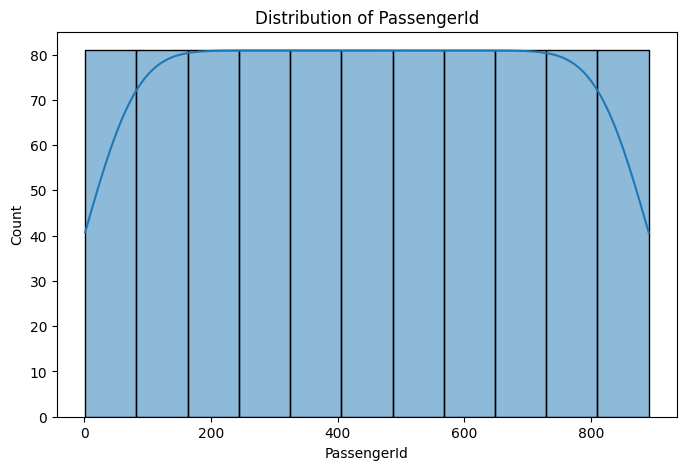

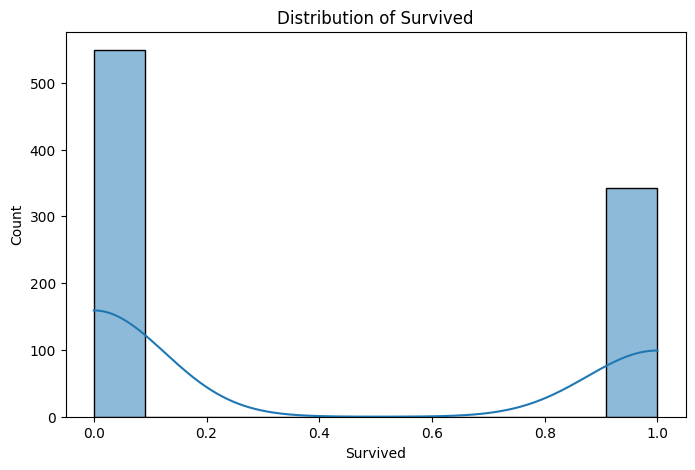

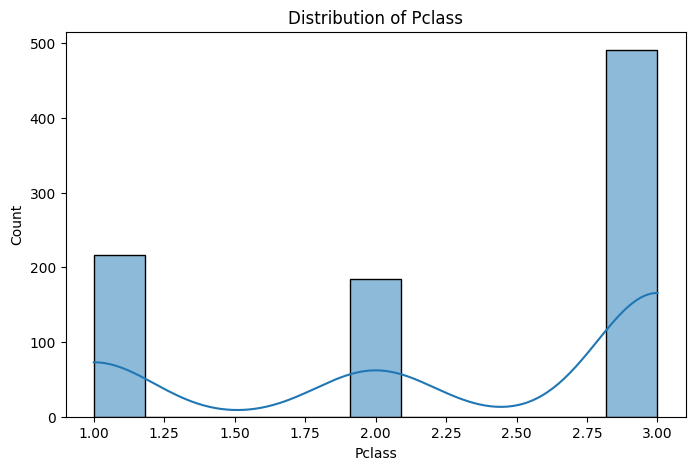

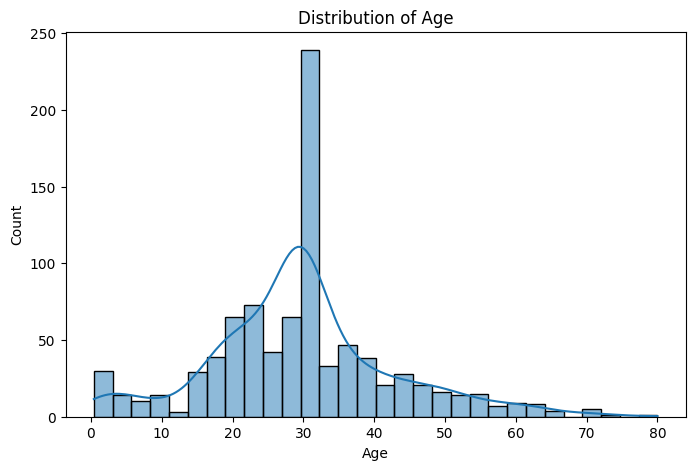

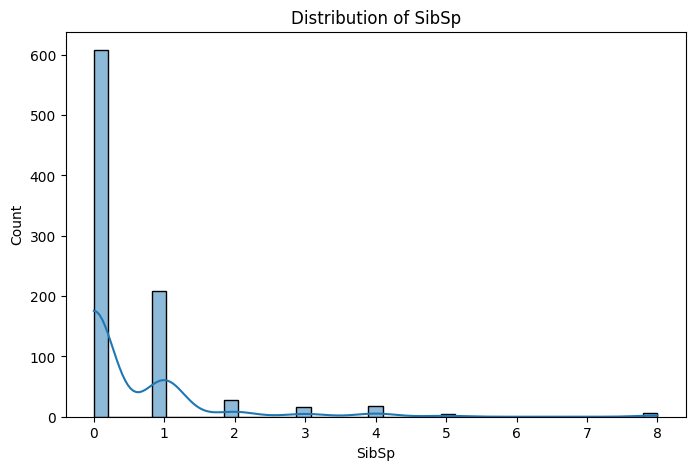

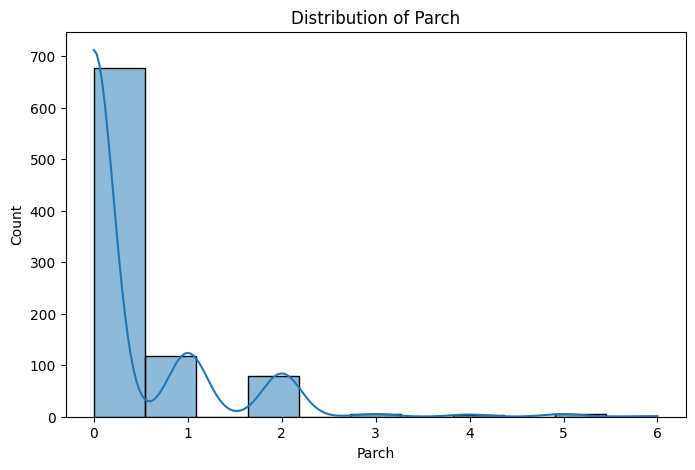

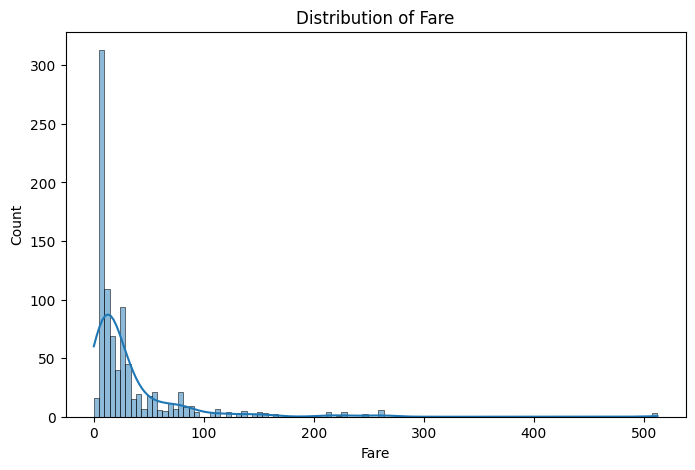

In [39]:
for column in cleaned_train_df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

## Box plots for numerical columns to check for outliers


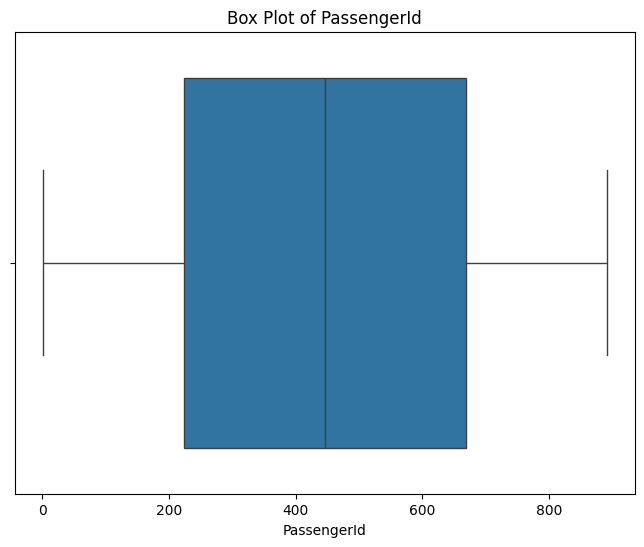

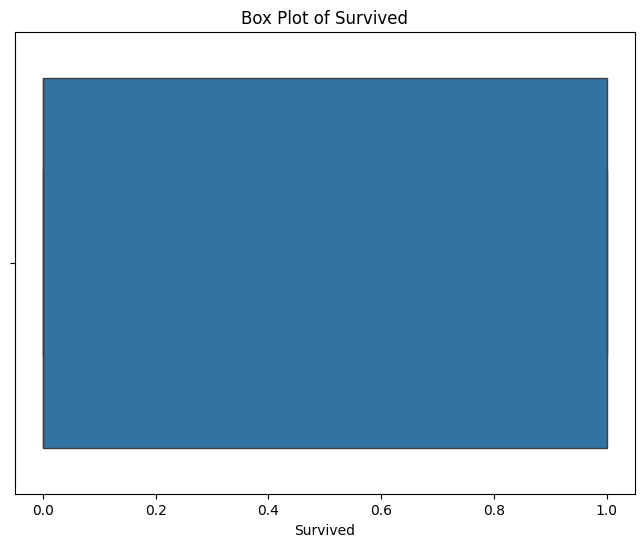

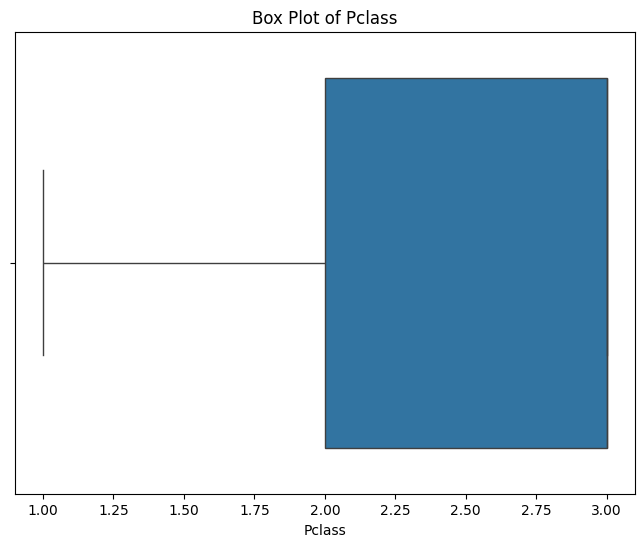

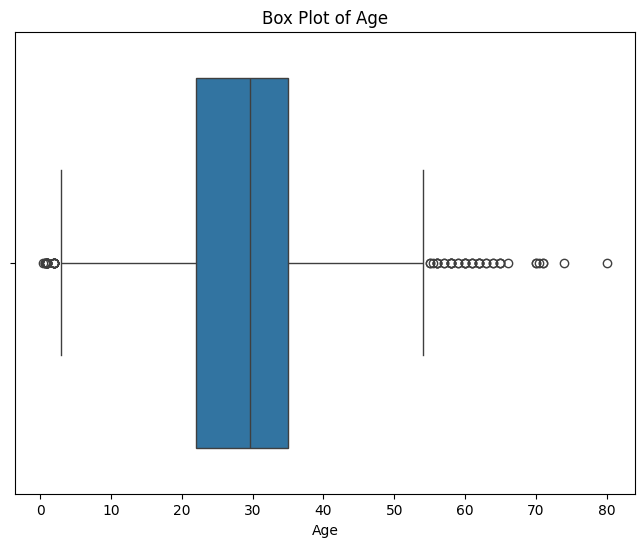

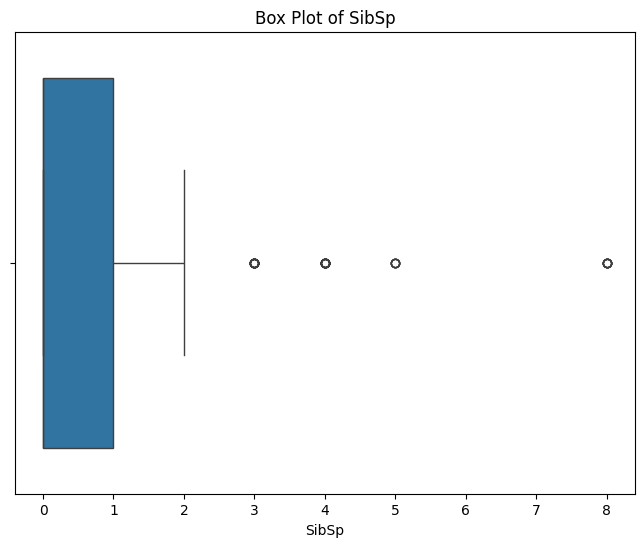

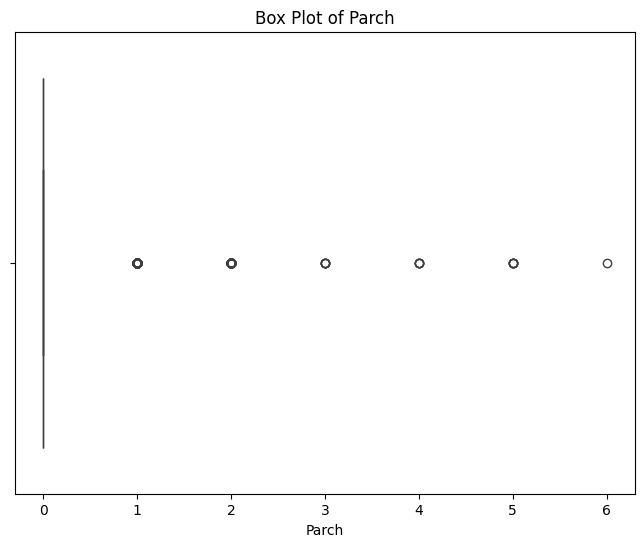

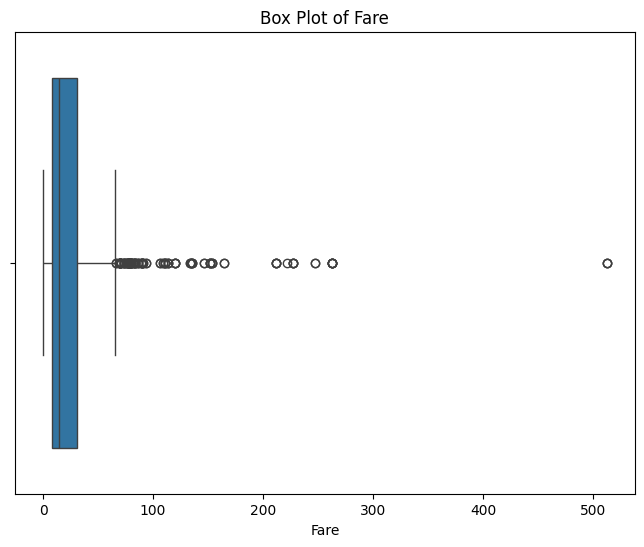

In [38]:
for column in cleaned_train_df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train_df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

## Pair plot for numerical columns


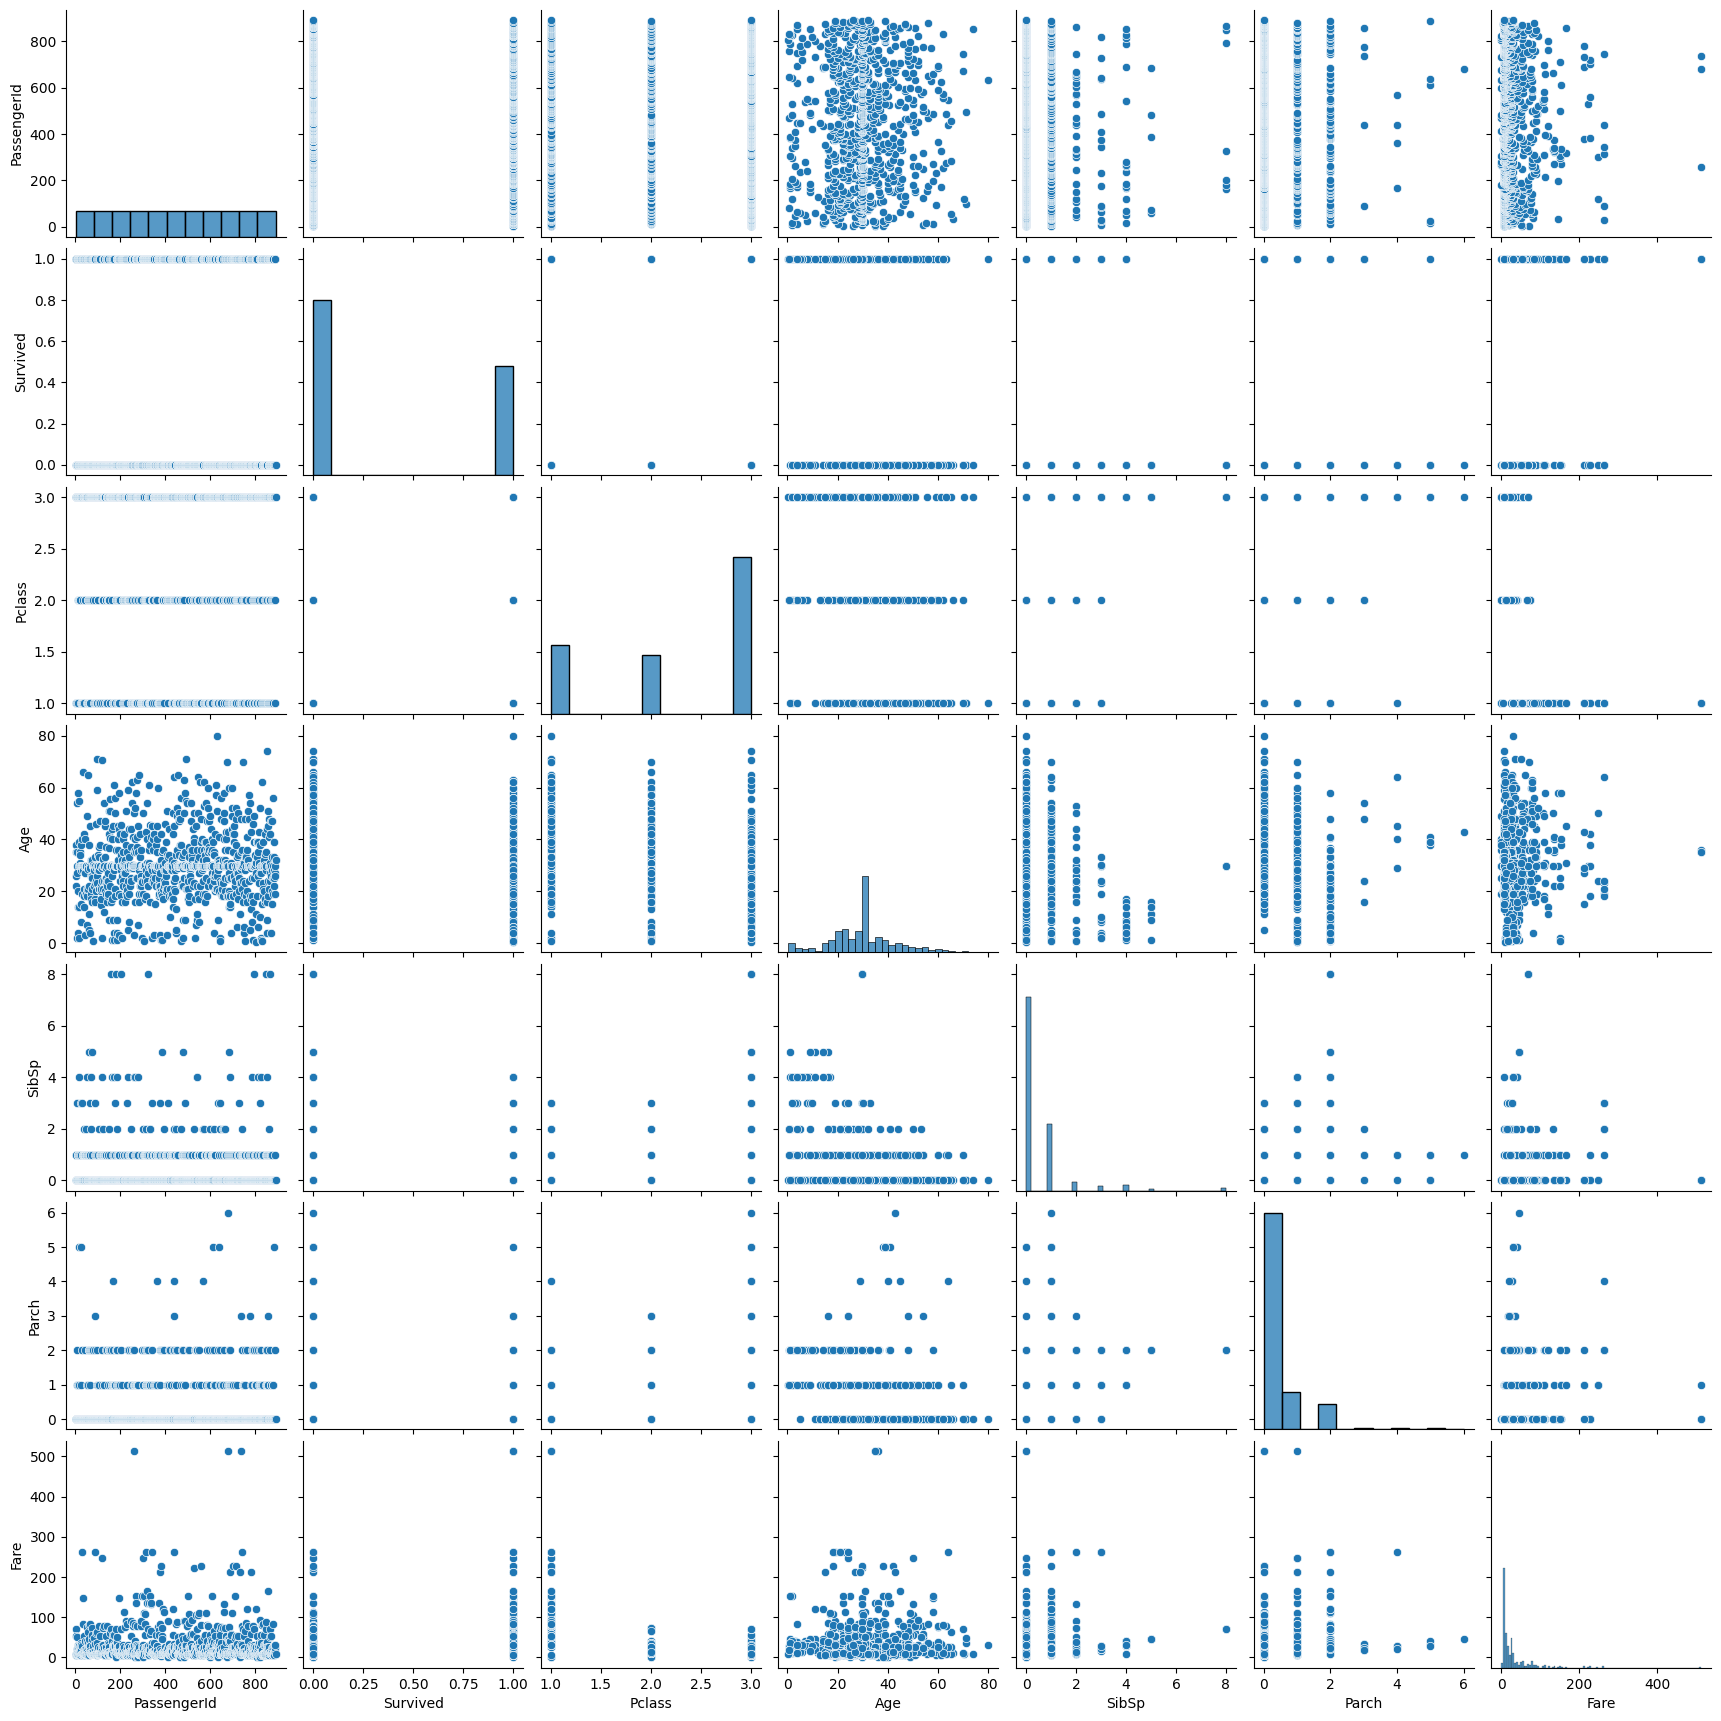

<Figure size 800x600 with 0 Axes>

In [41]:
sns.pairplot(cleaned_train_df.select_dtypes(include=[np.number]))
plt.figure(figsize=(8, 6))
plt.show()

# Step 3: Exploring Relationships Between Variables


To investigate relationships between variables, we'll make use of scatter plots, correlation matrices, and other techniques.


## Correlation matrix


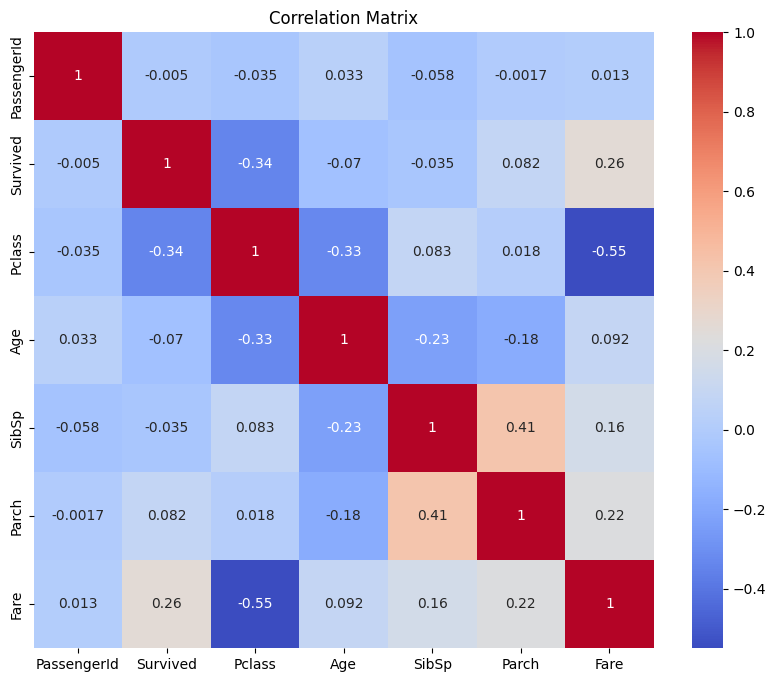

In [45]:
# Selecting only numeric columns for correlation calculation
plt.figure(figsize=(10, 8))
correlation_matrix = cleaned_train_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Scatter plots for pairs of numerical variables


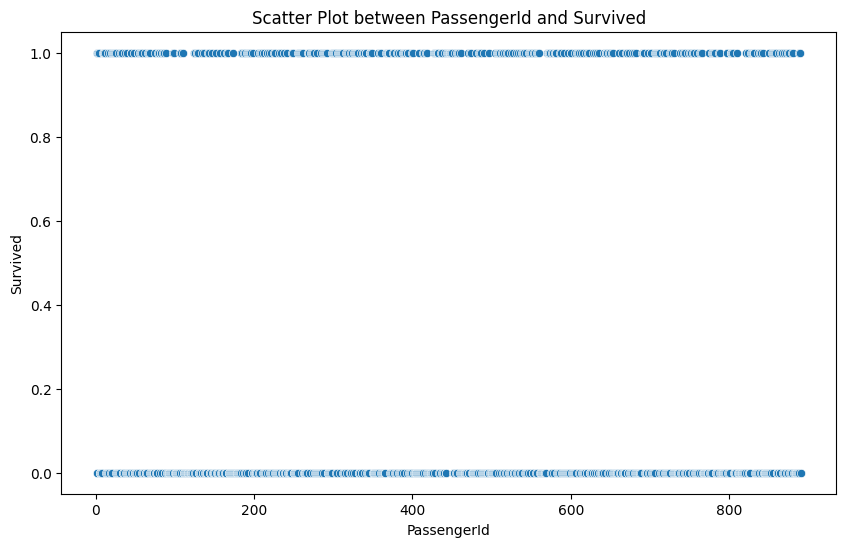

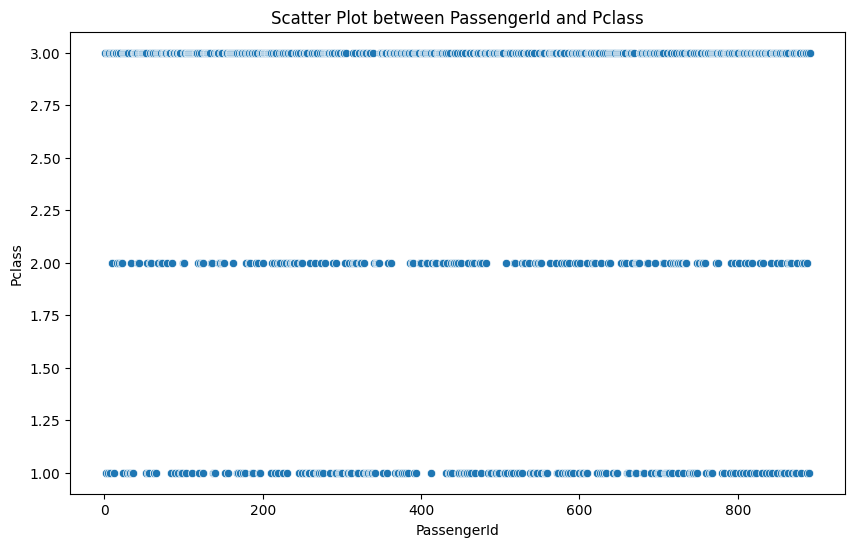

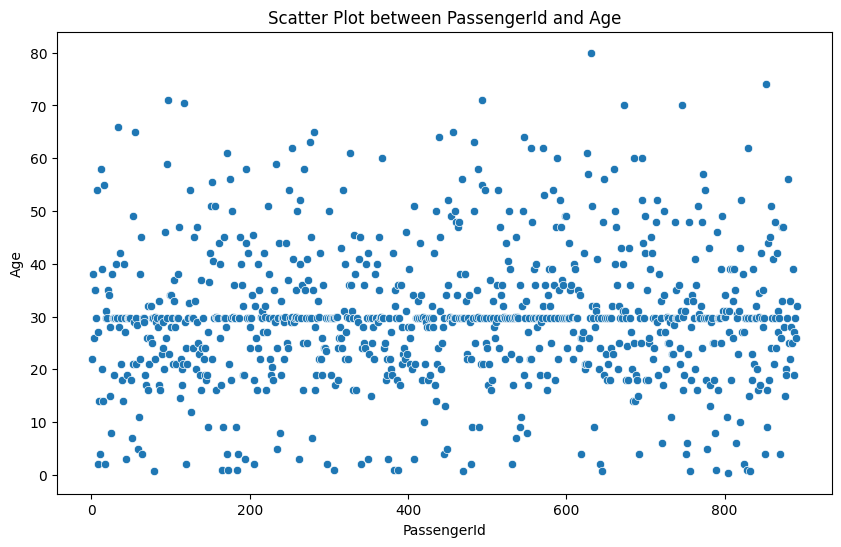

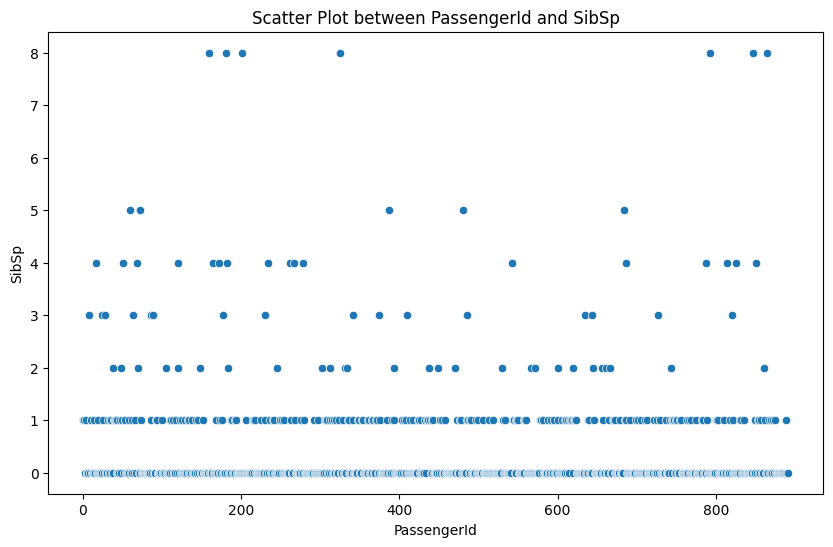

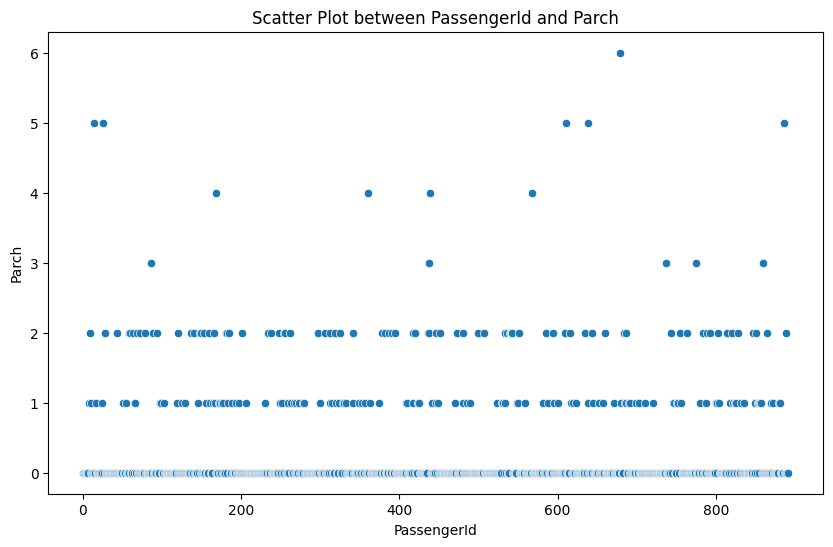

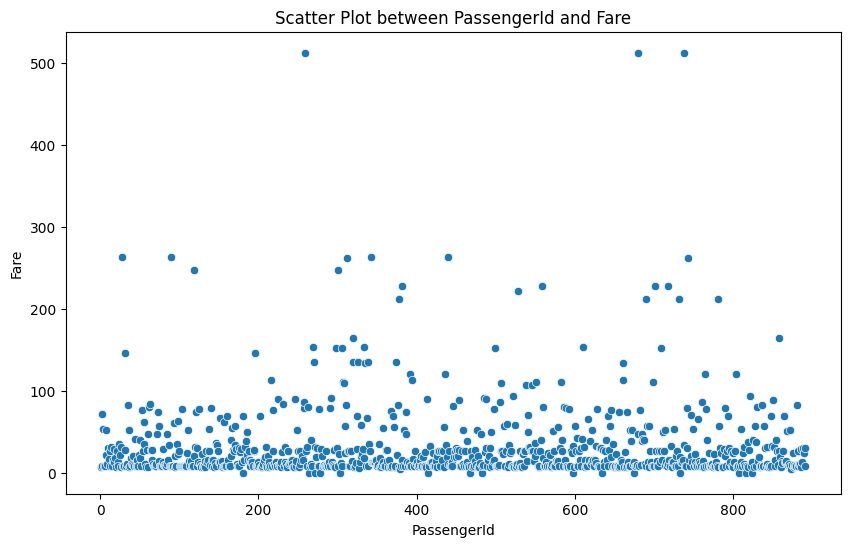

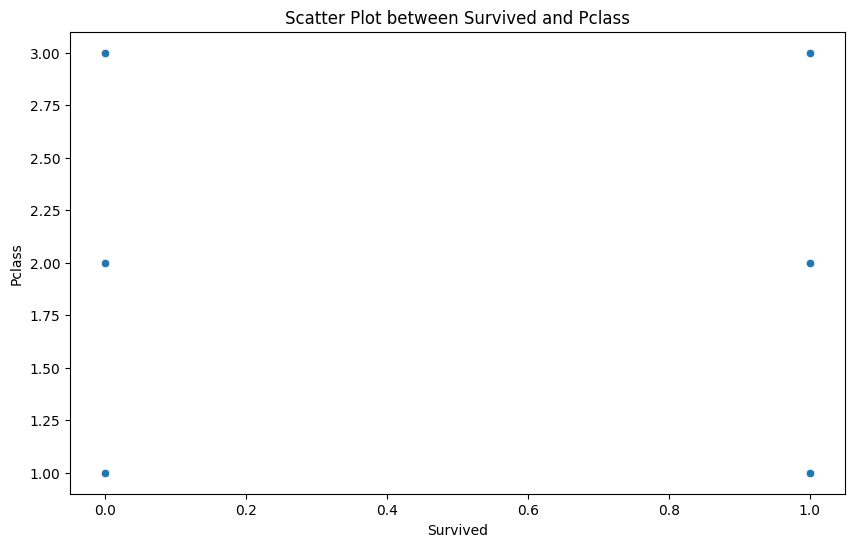

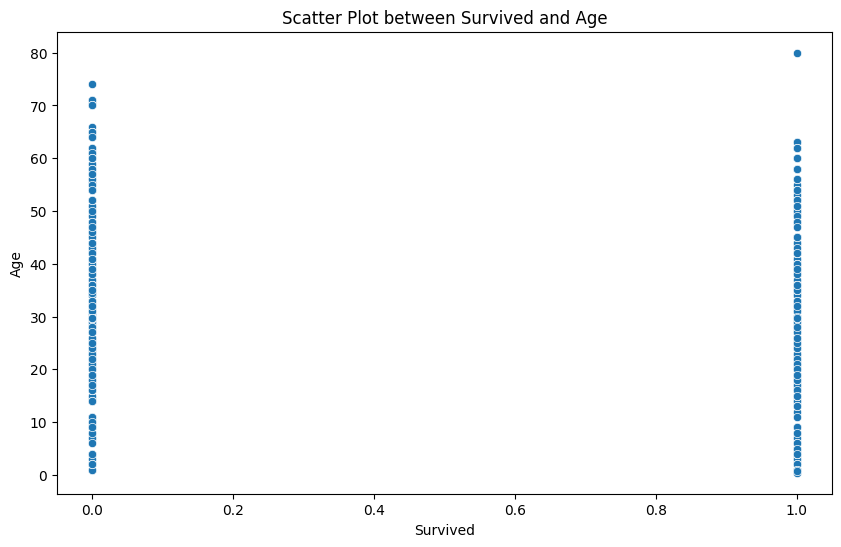

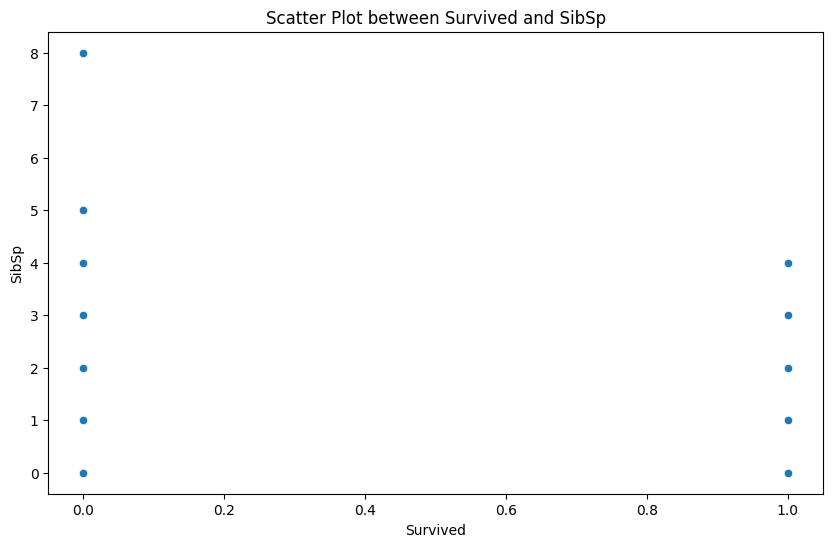

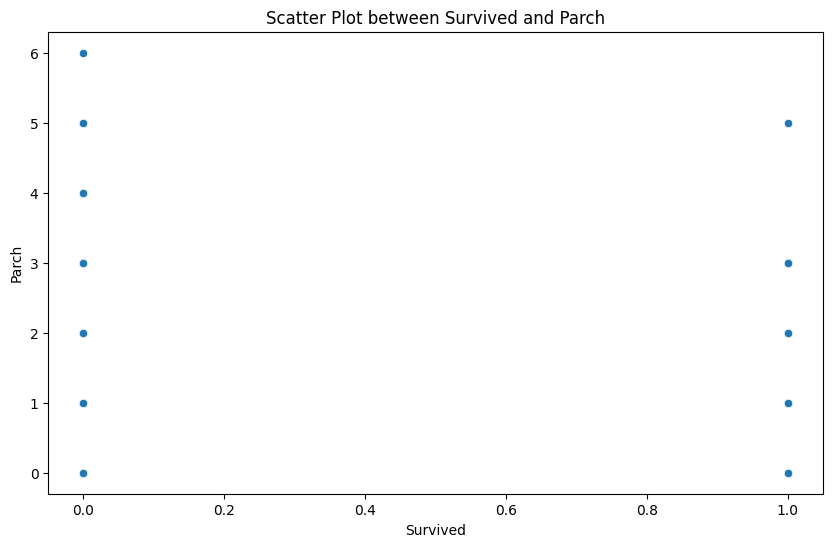

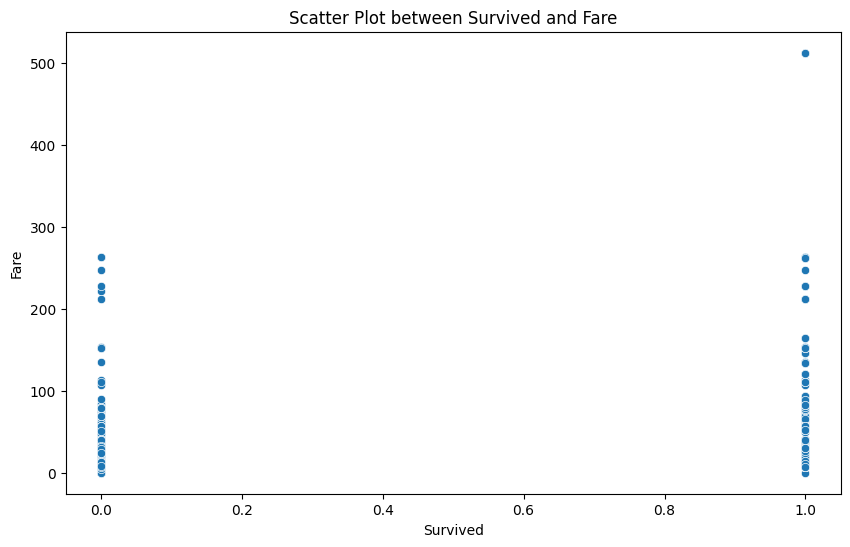

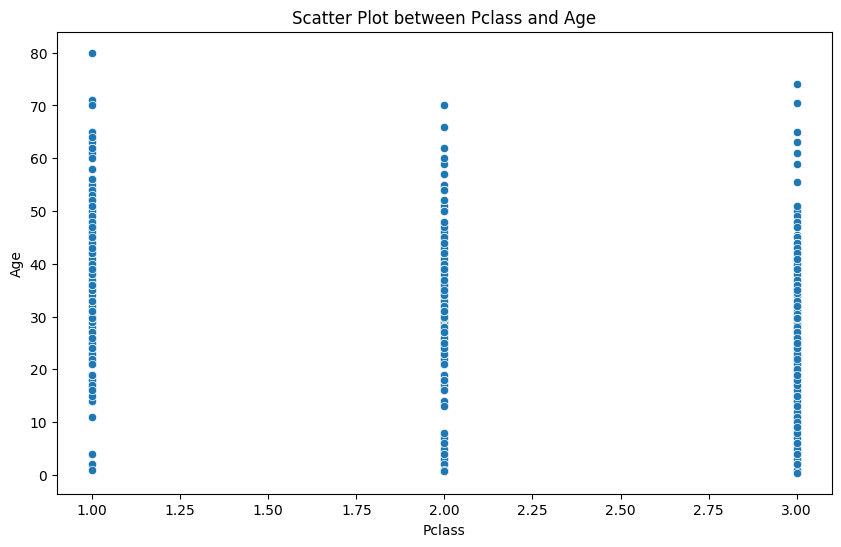

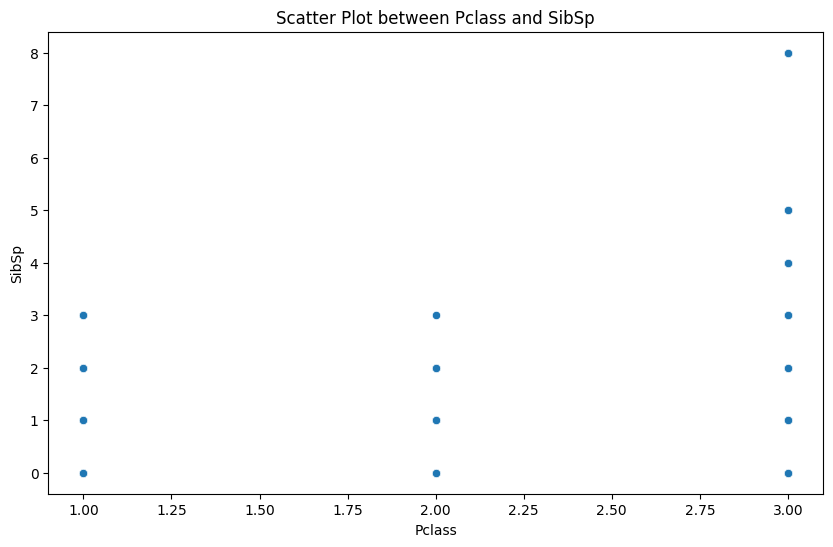

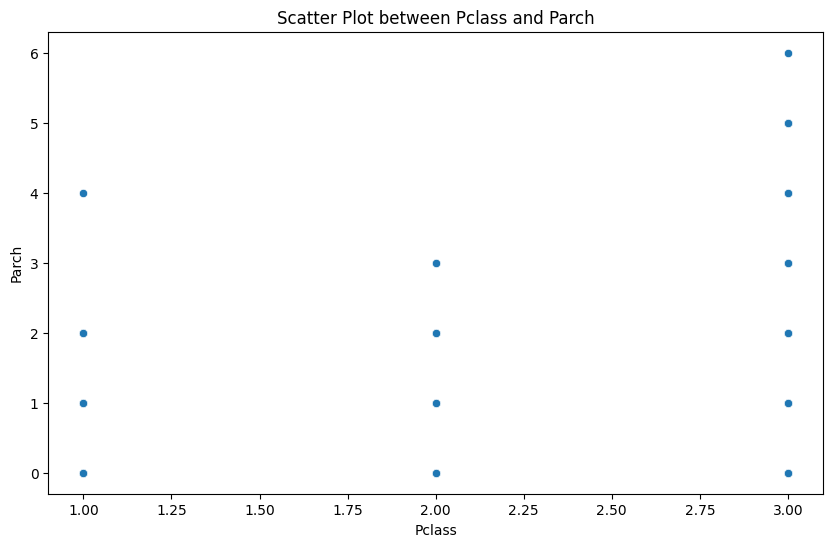

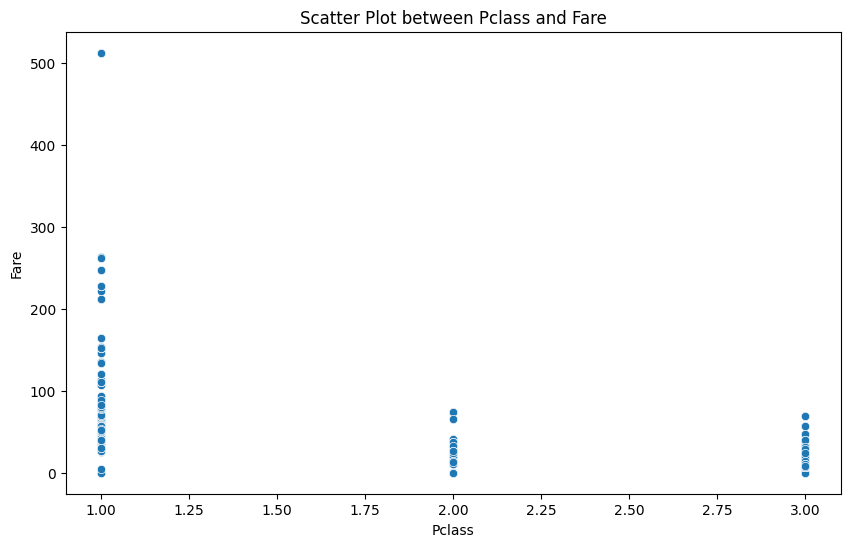

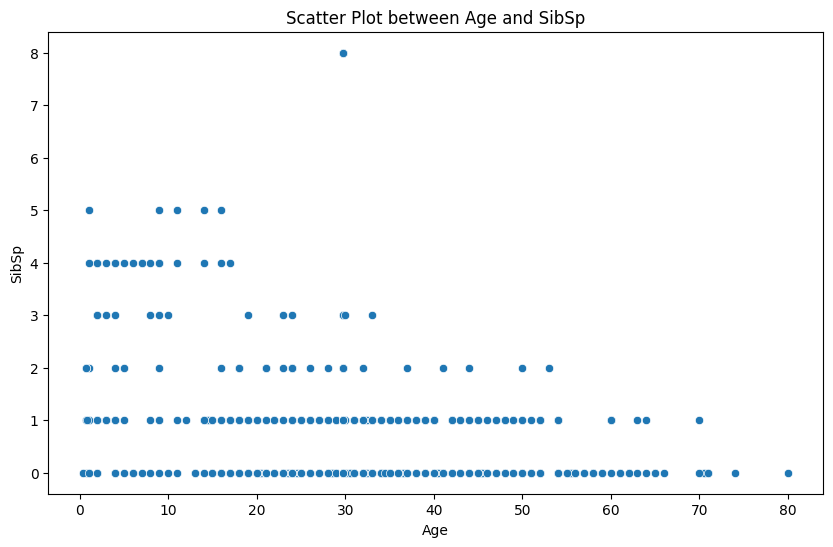

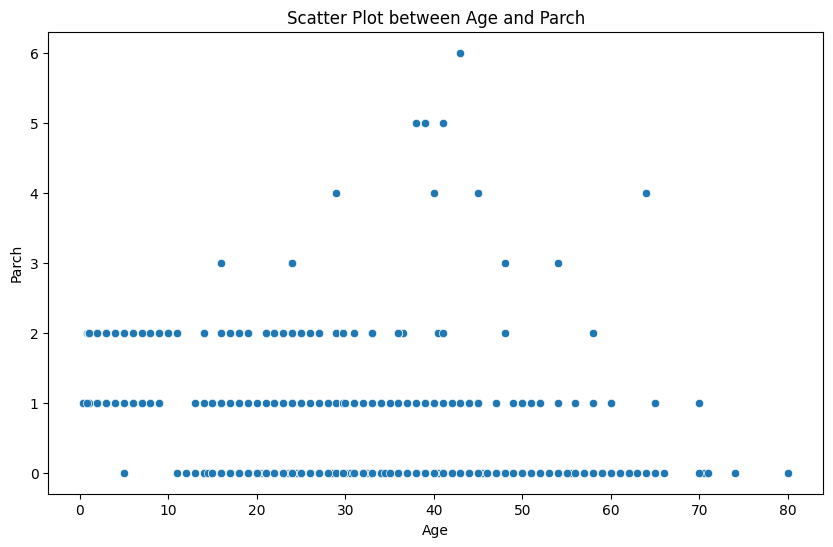

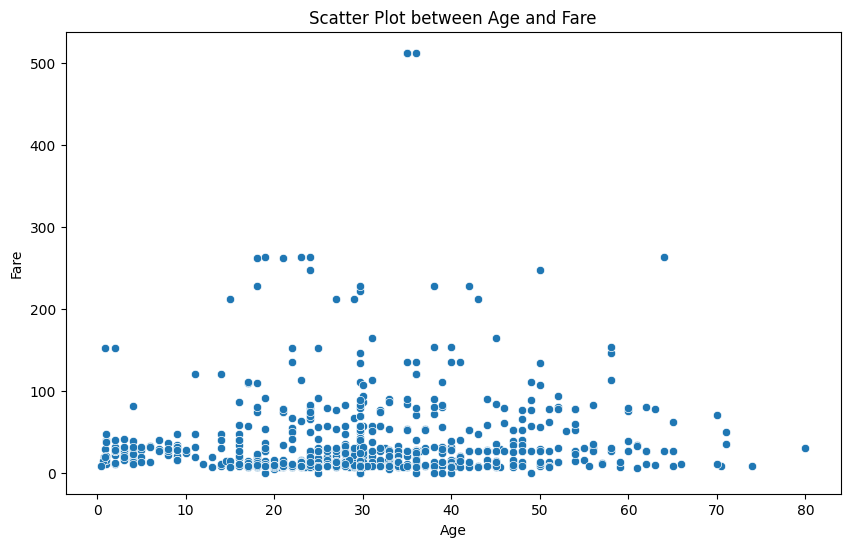

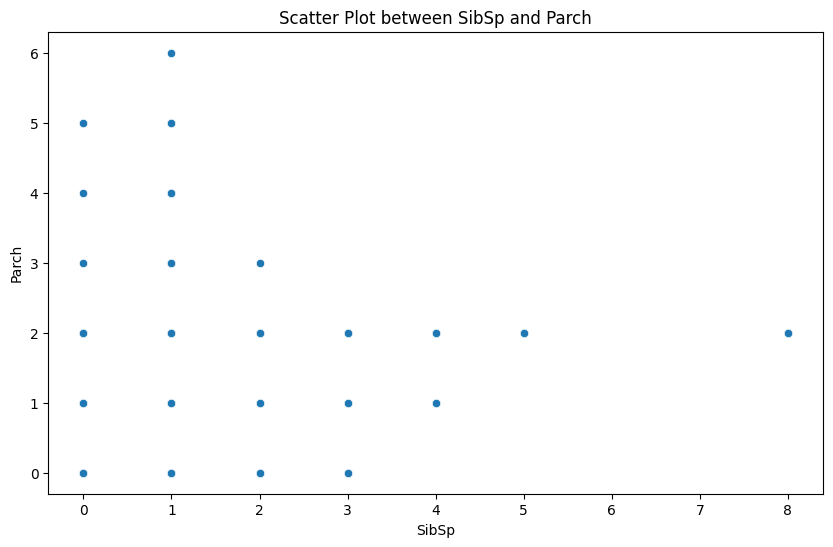

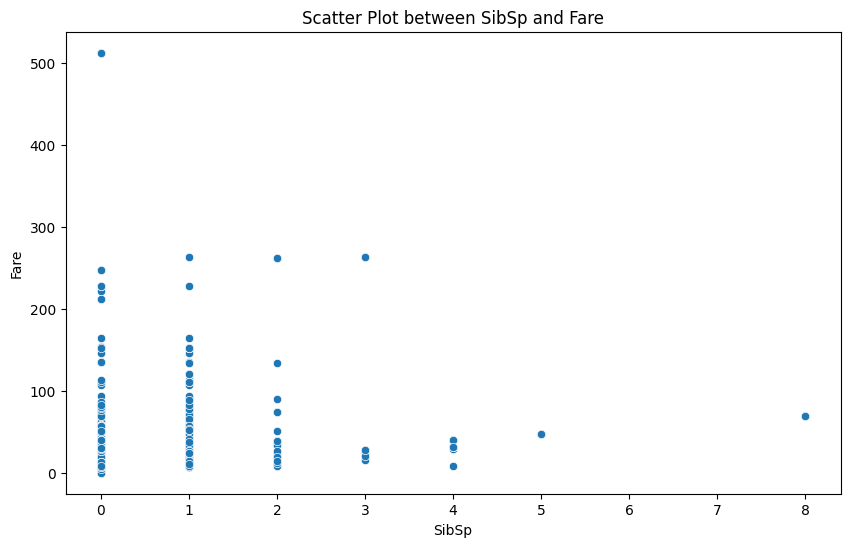

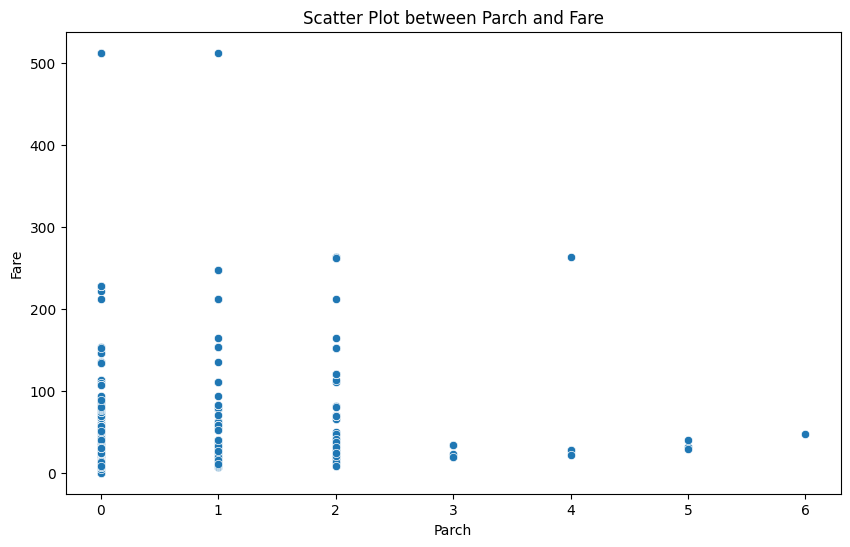

In [46]:
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=cleaned_train_df[numerical_cols[i]], y=cleaned_train_df[numerical_cols[j]])
        plt.title(f'Scatter Plot between {numerical_cols[i]} and {numerical_cols[j]}')
        plt.show()

## Categorical vs Numerical relationships


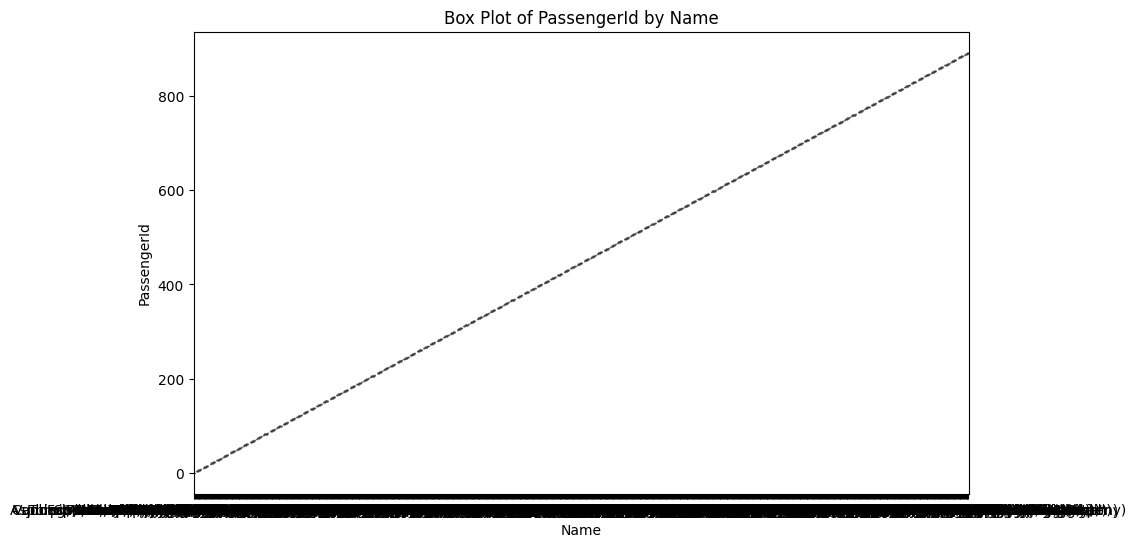

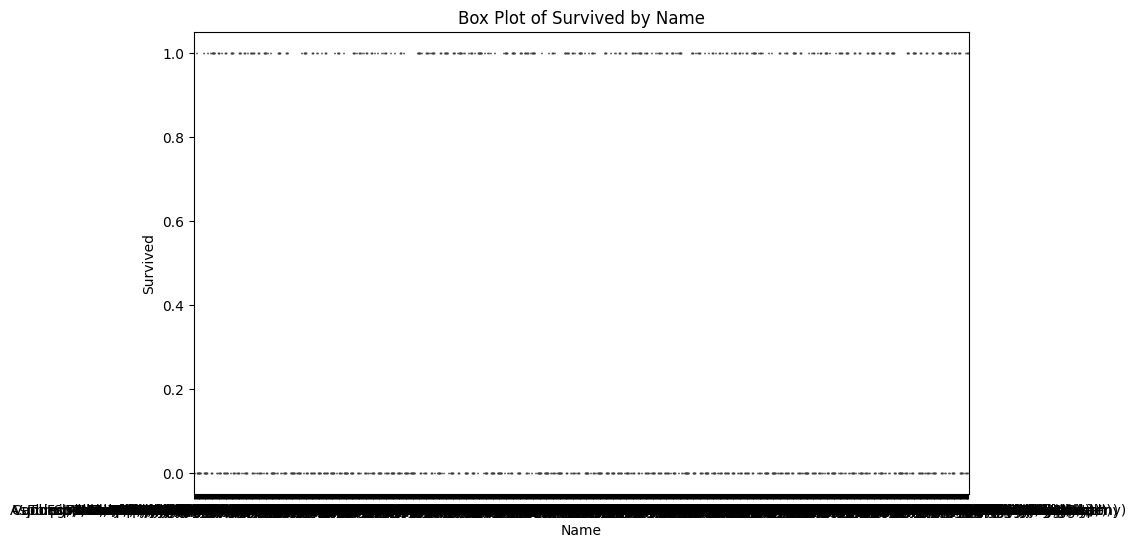

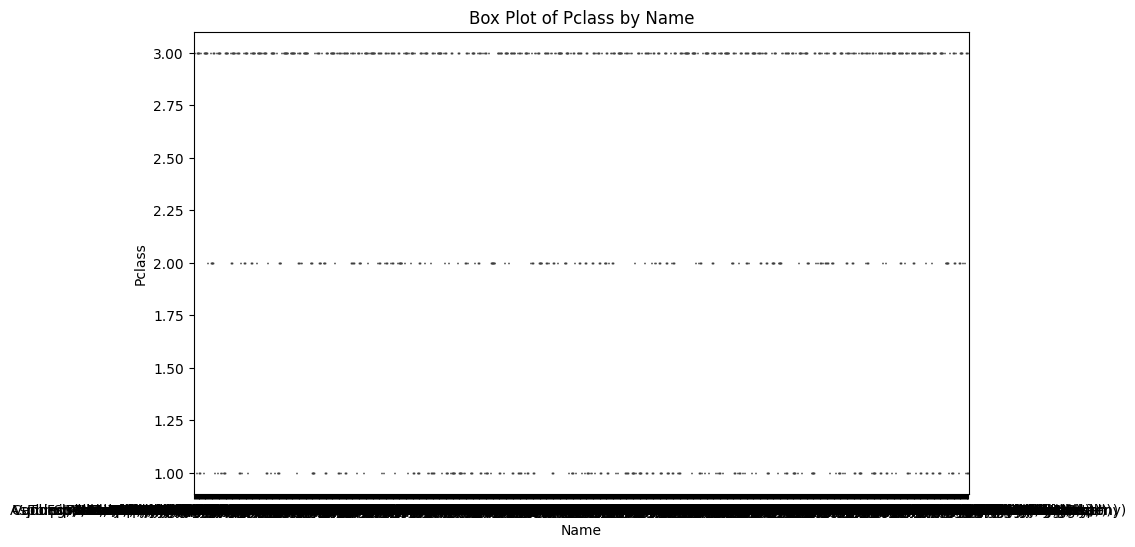

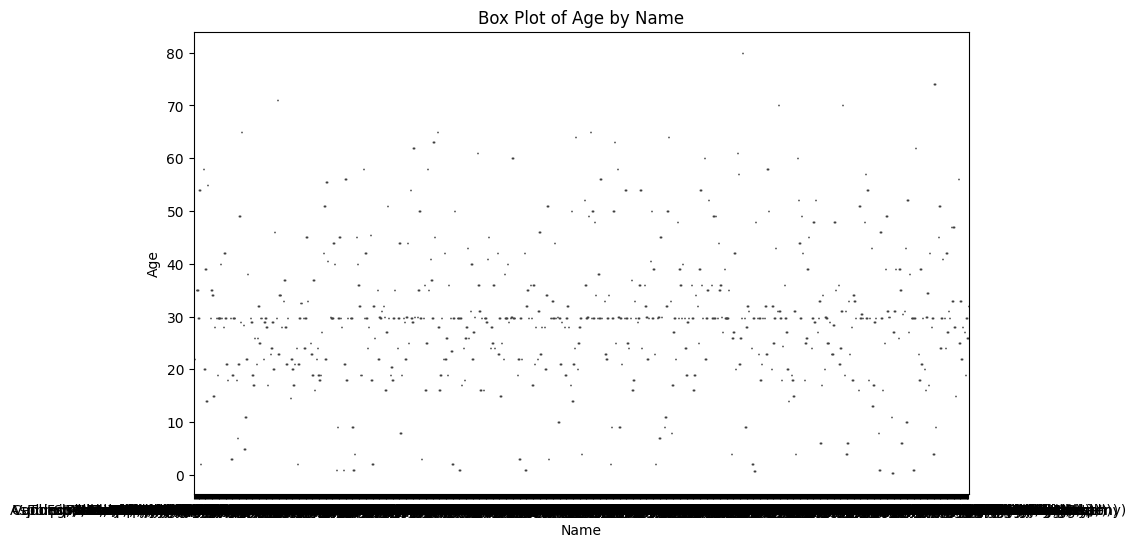

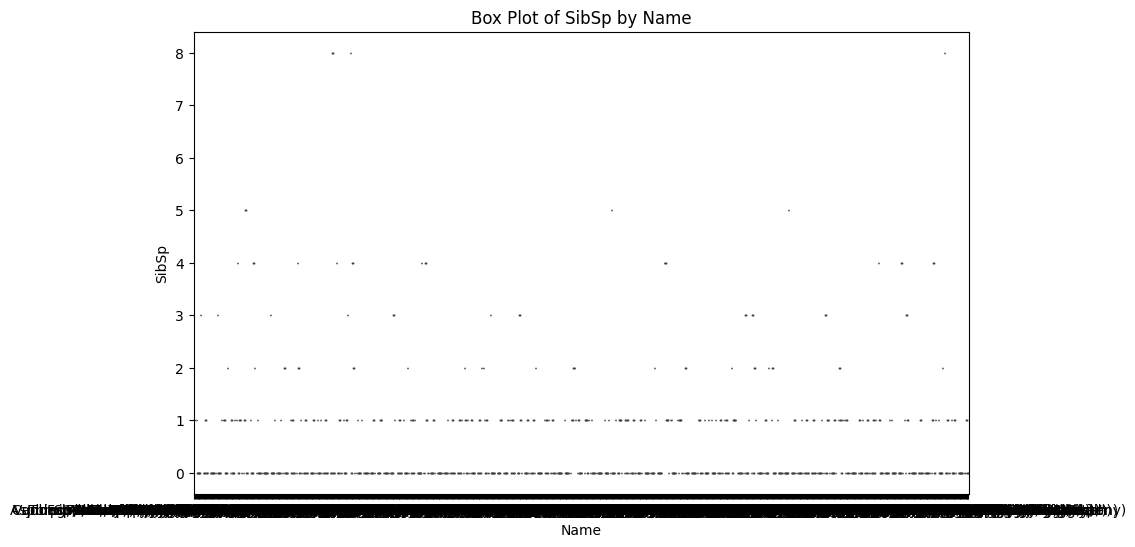

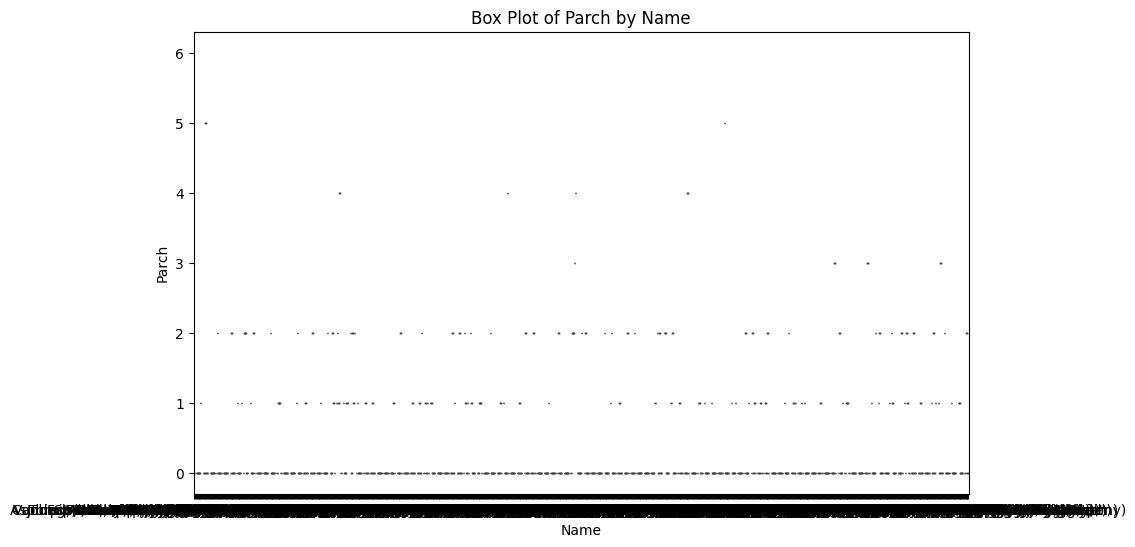

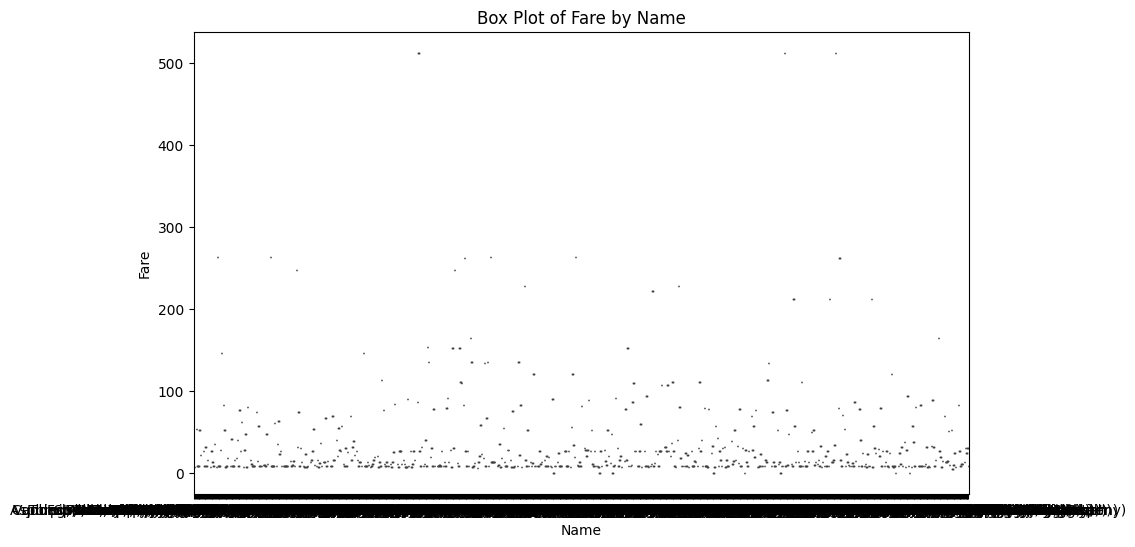

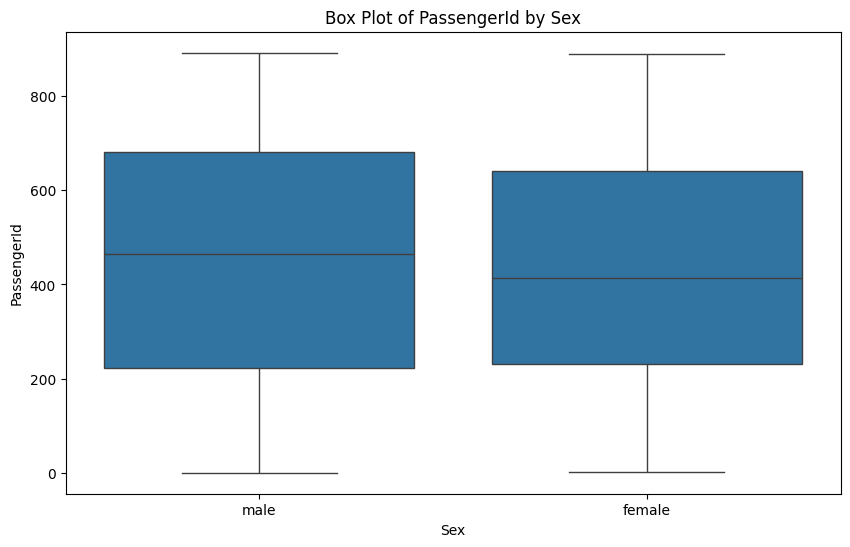

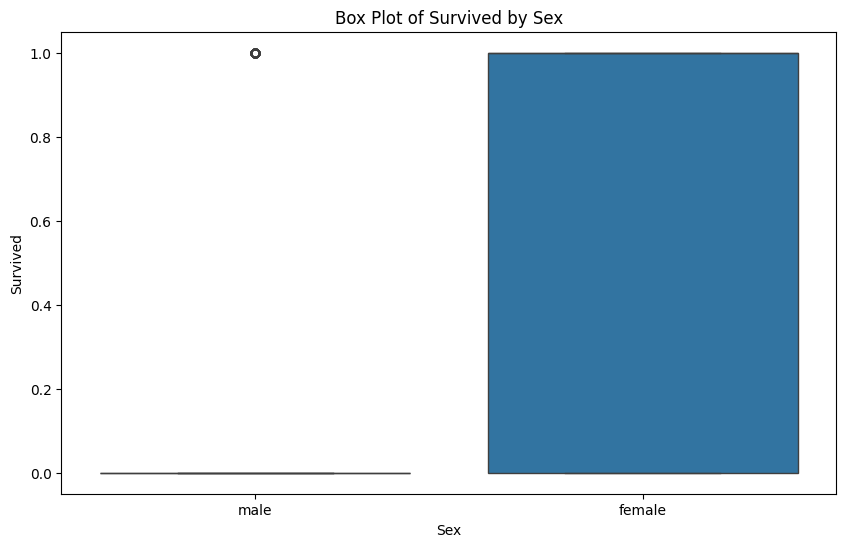

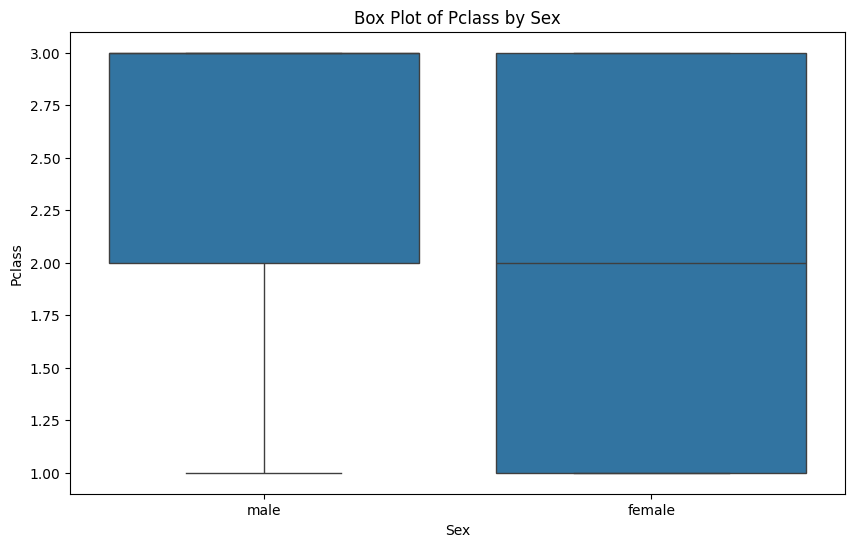

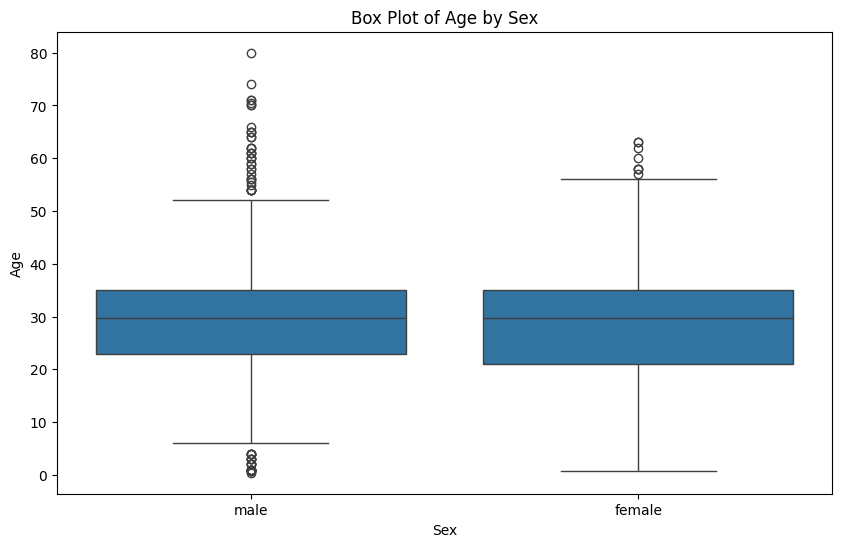

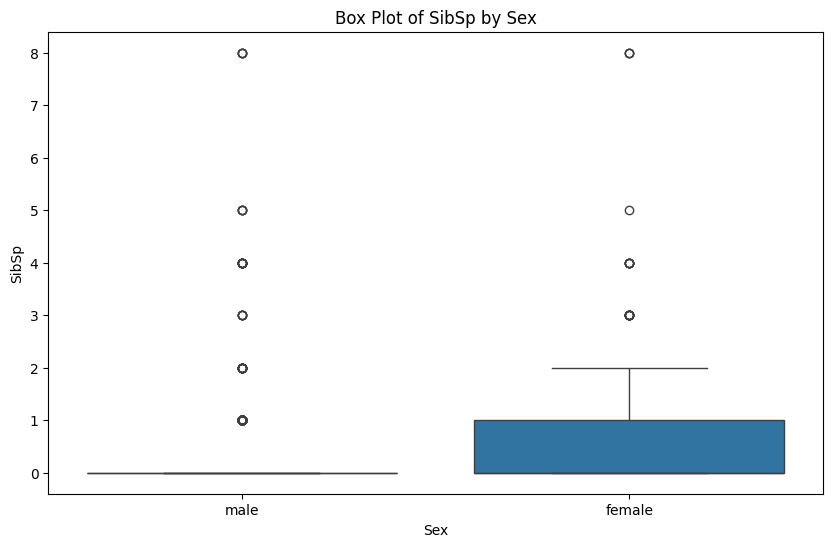

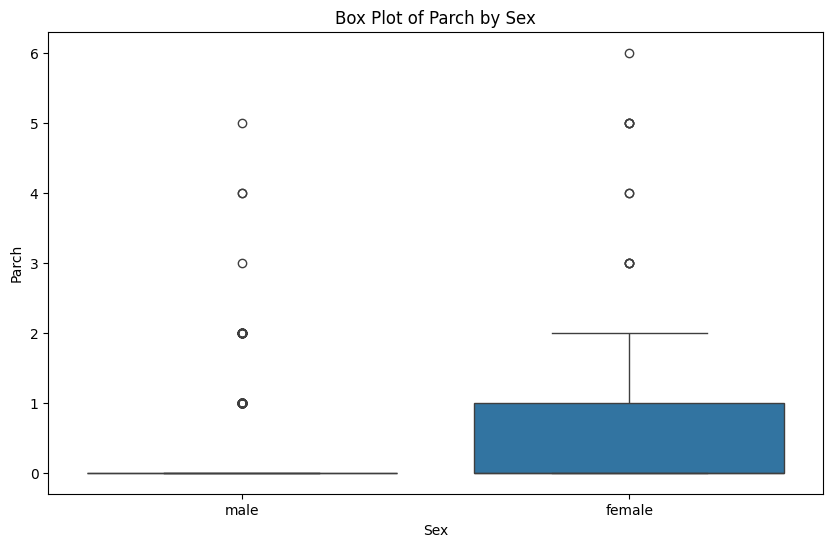

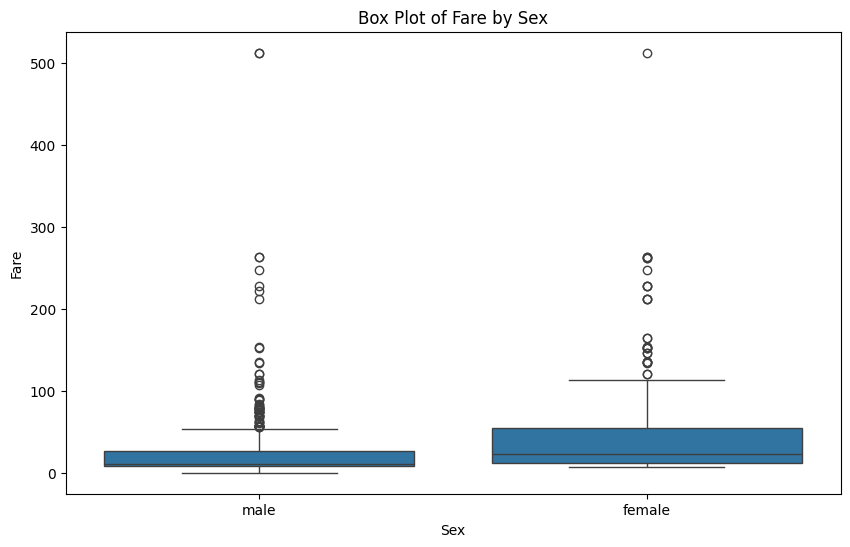

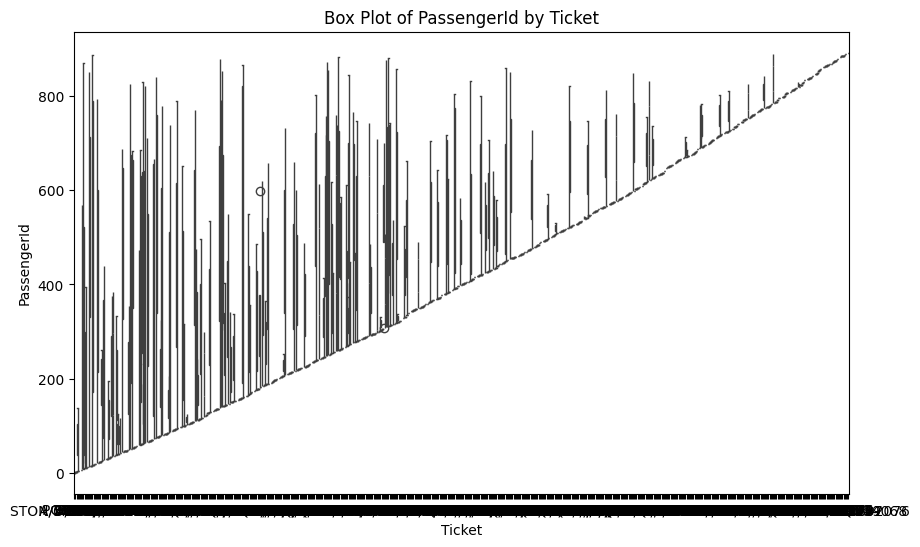

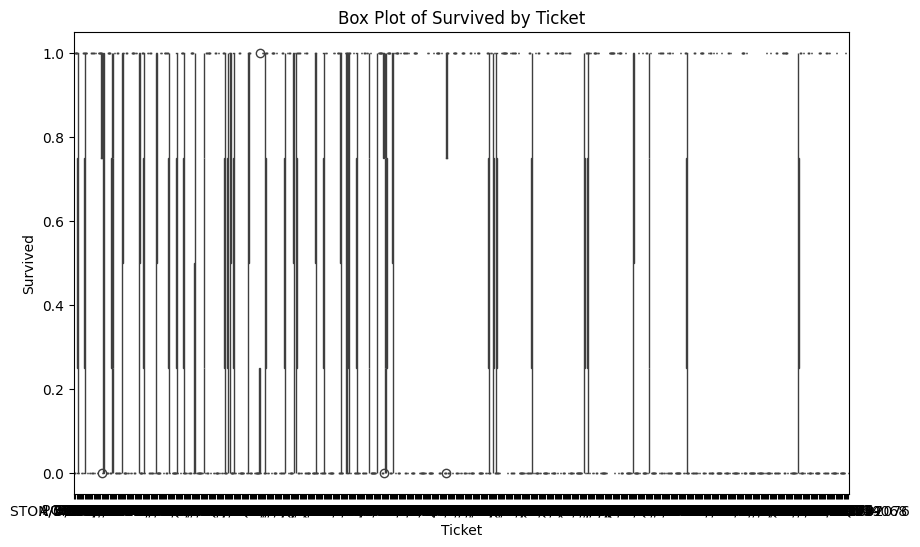

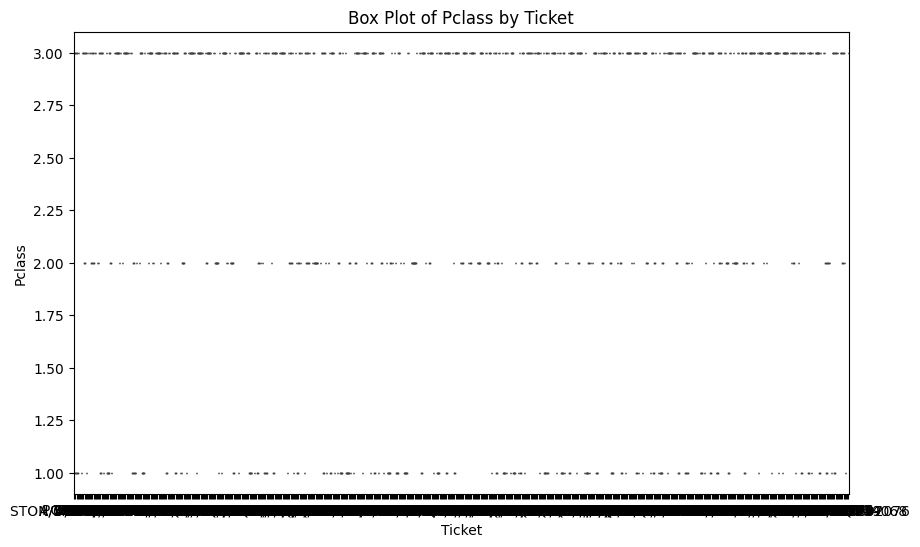

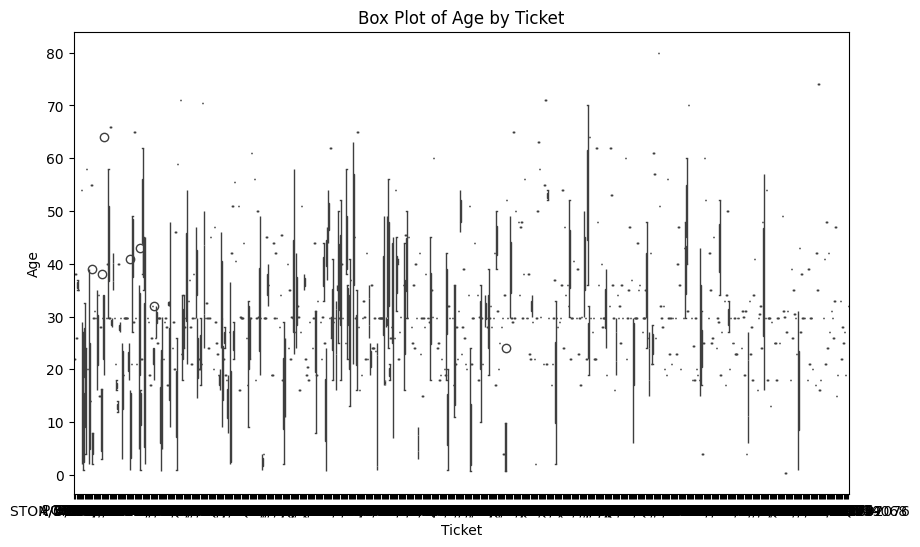

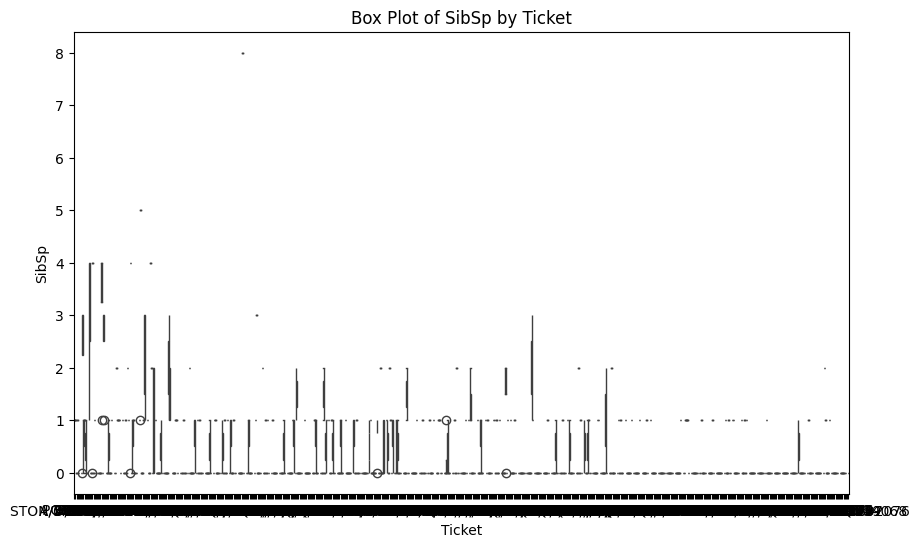

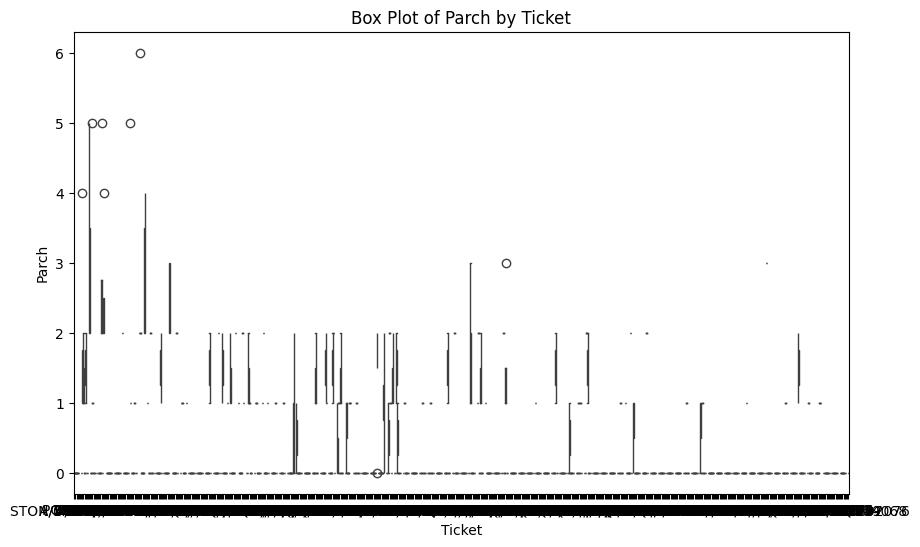

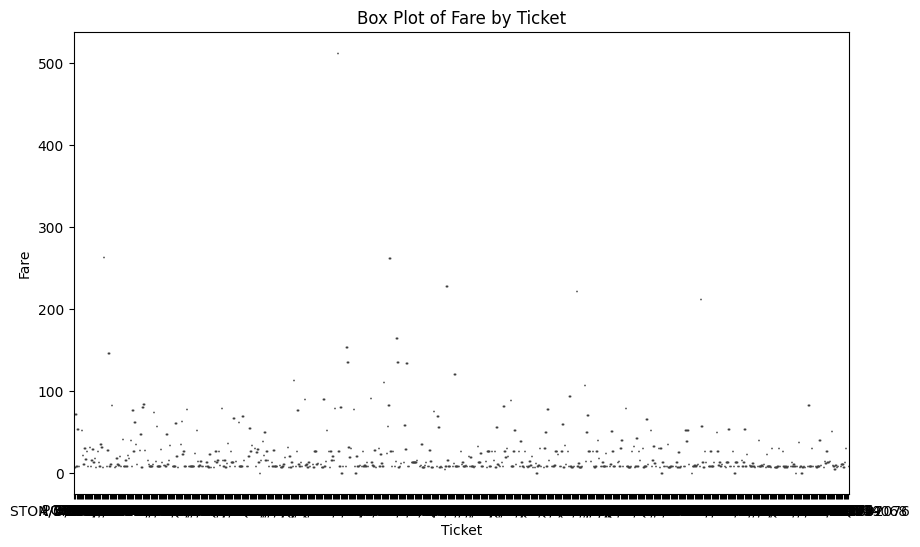

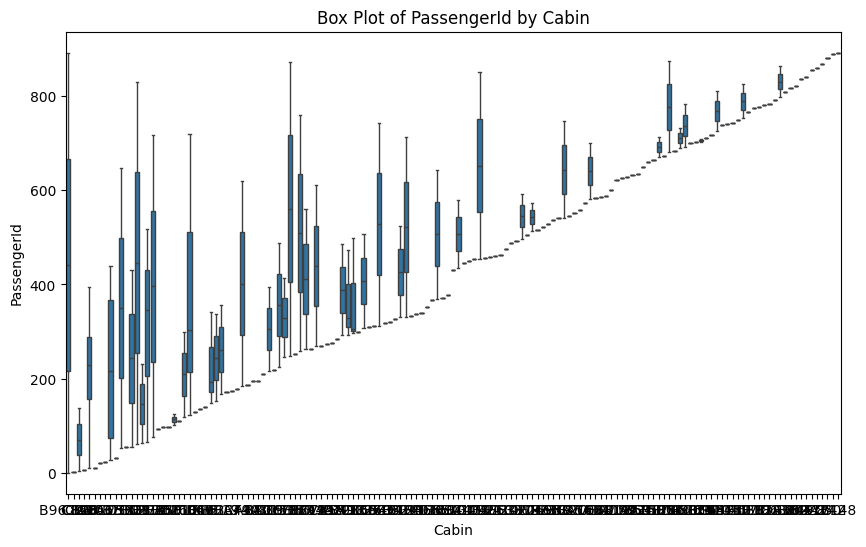

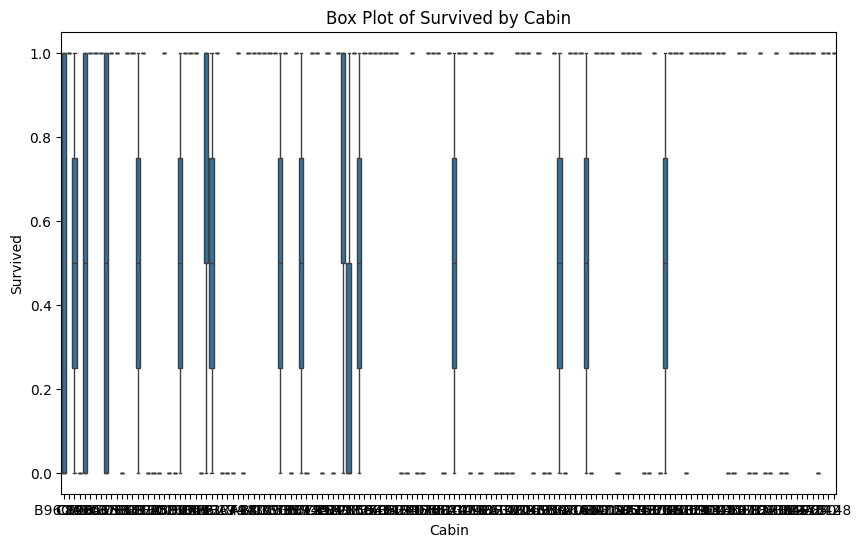

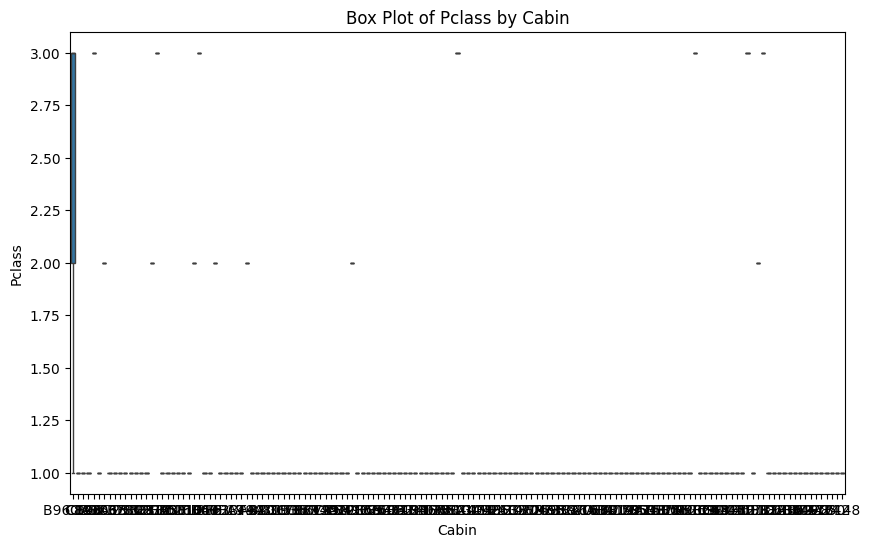

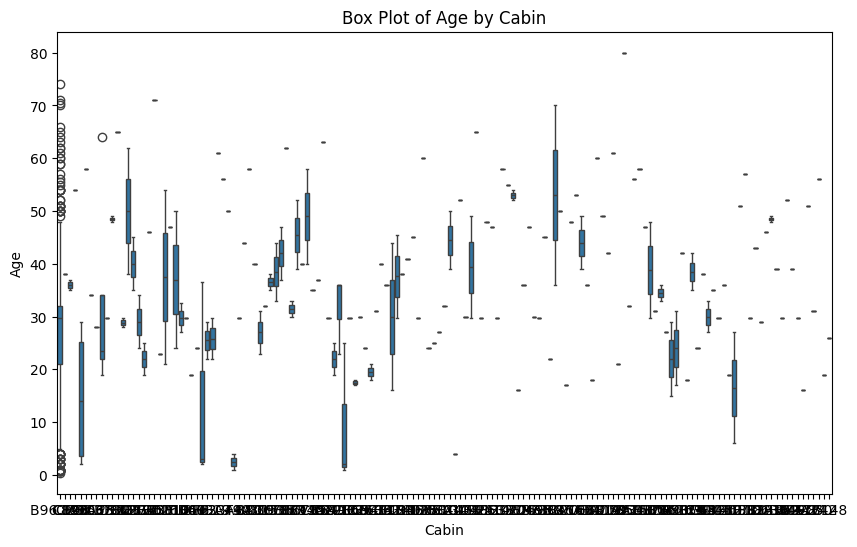

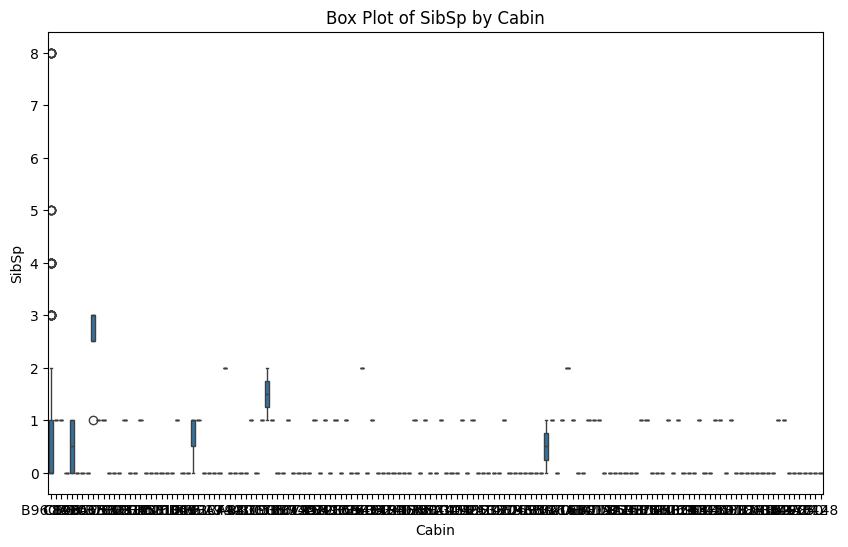

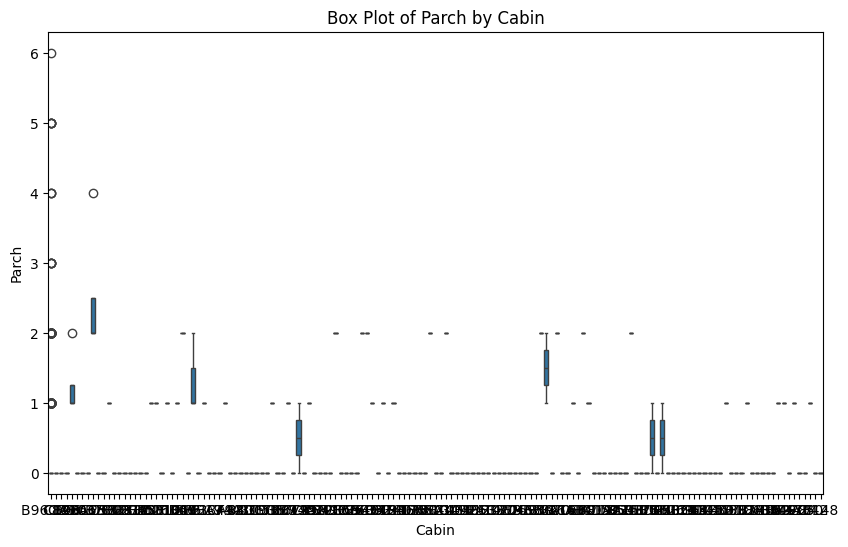

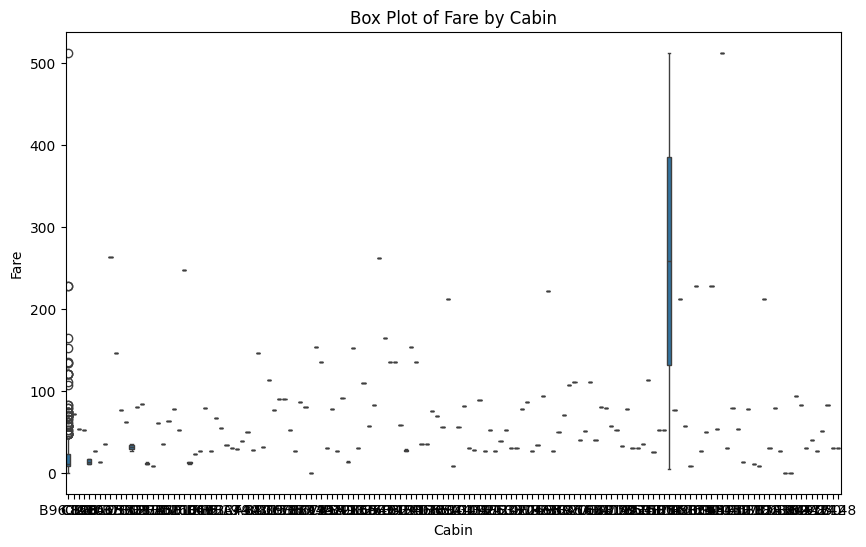

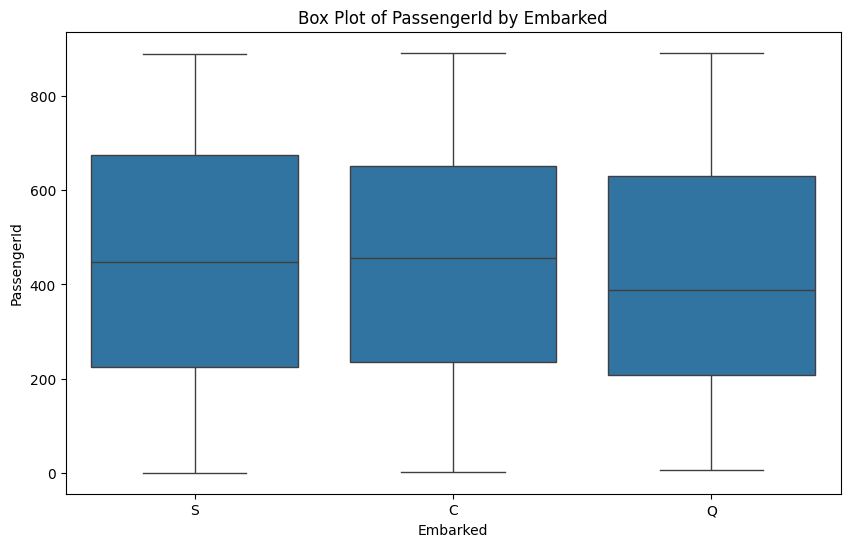

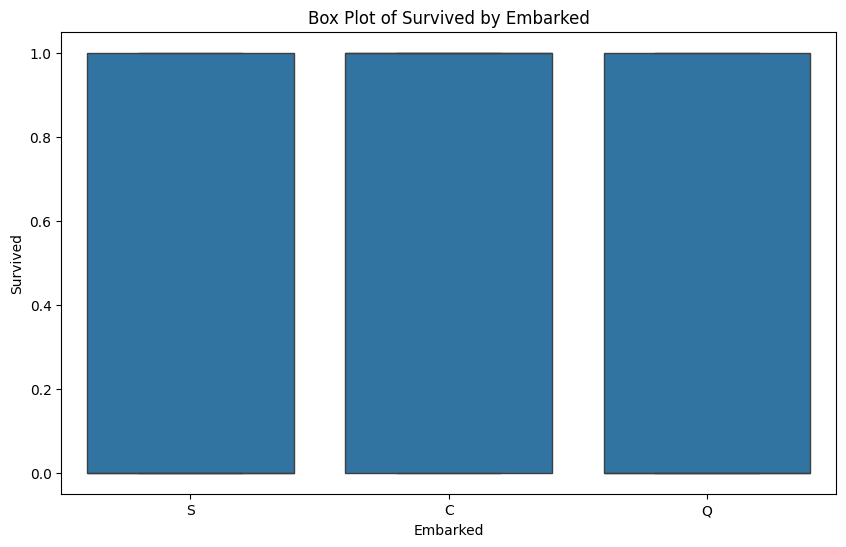

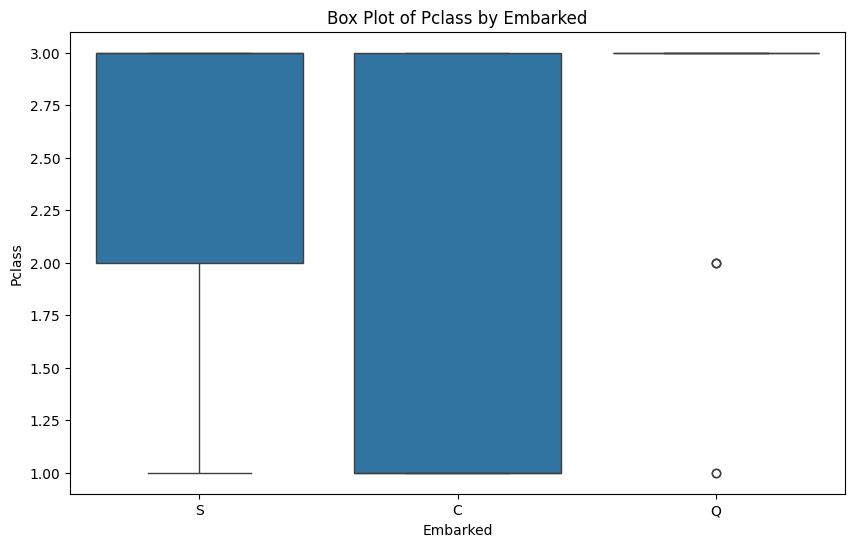

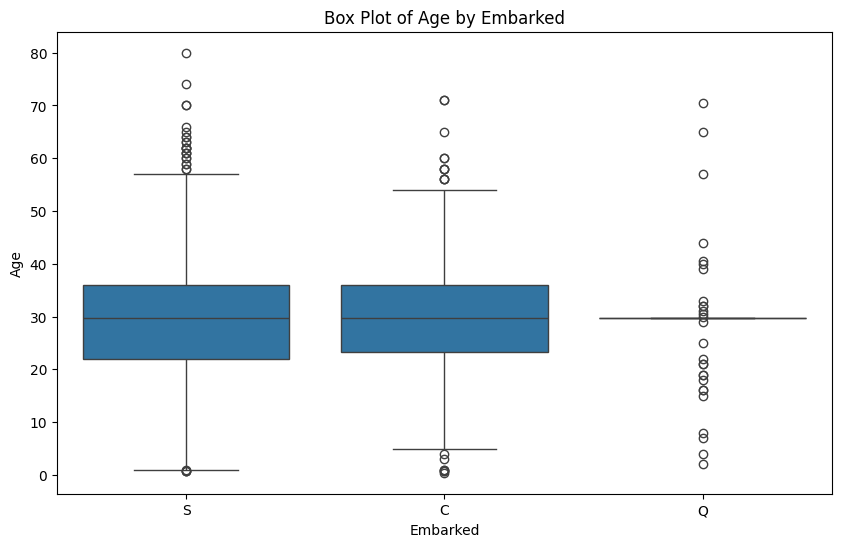

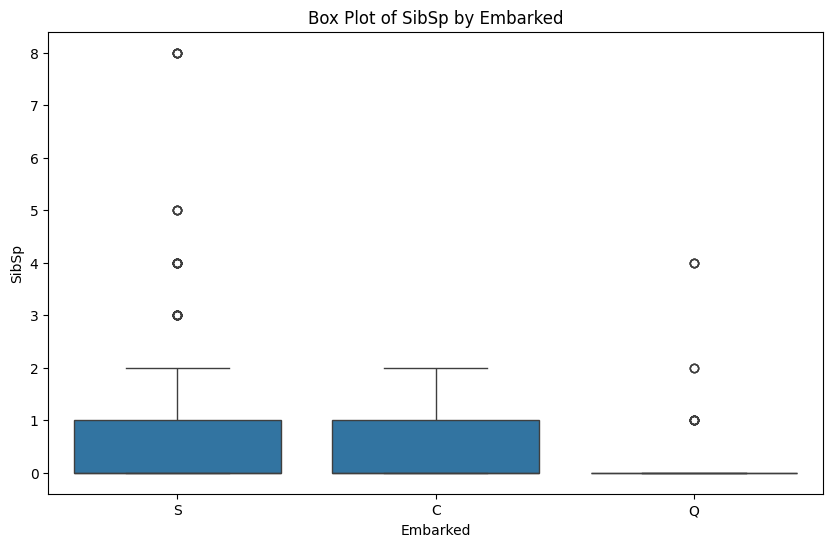

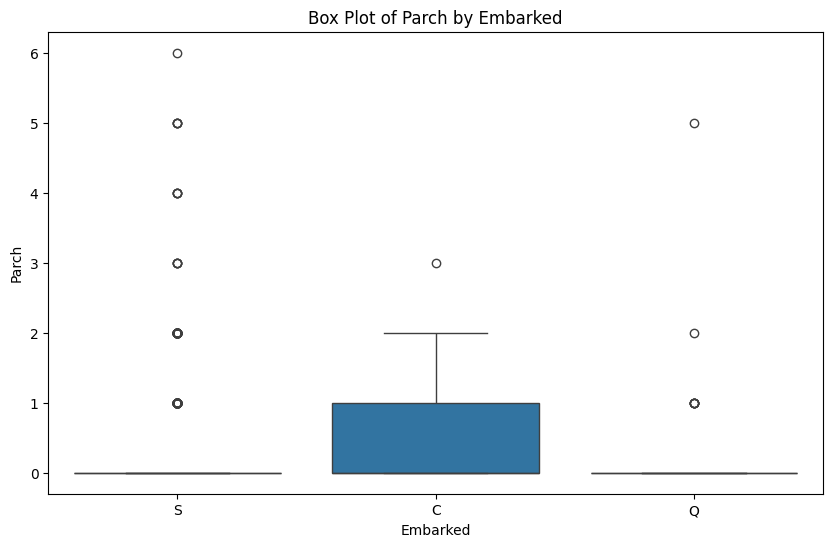

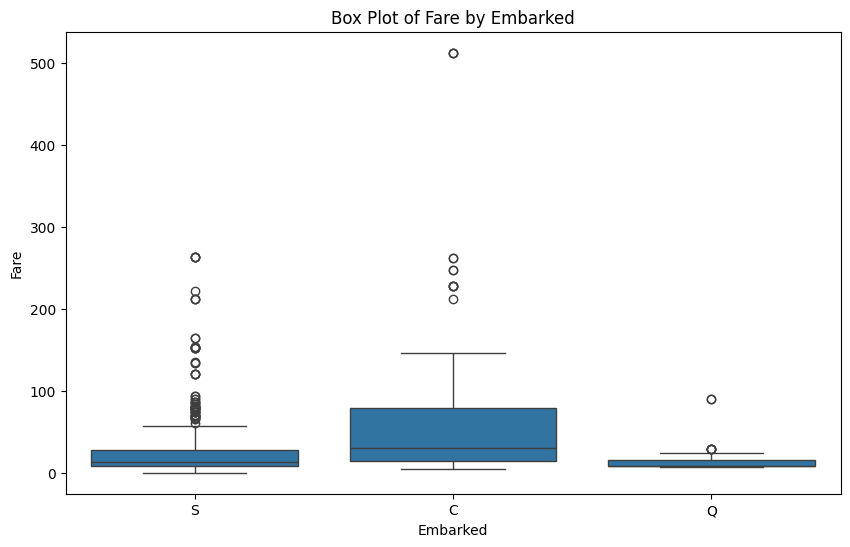

In [47]:
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cleaned_train_df[cat_col], y=cleaned_train_df[num_col])
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.show()

# Step 4: Identifying Patterns and Trends

Identifying patterns and trends in the data using Count plot, bar plot, grouping, aggregate and heatmap

## Count plot for Sex and Survived


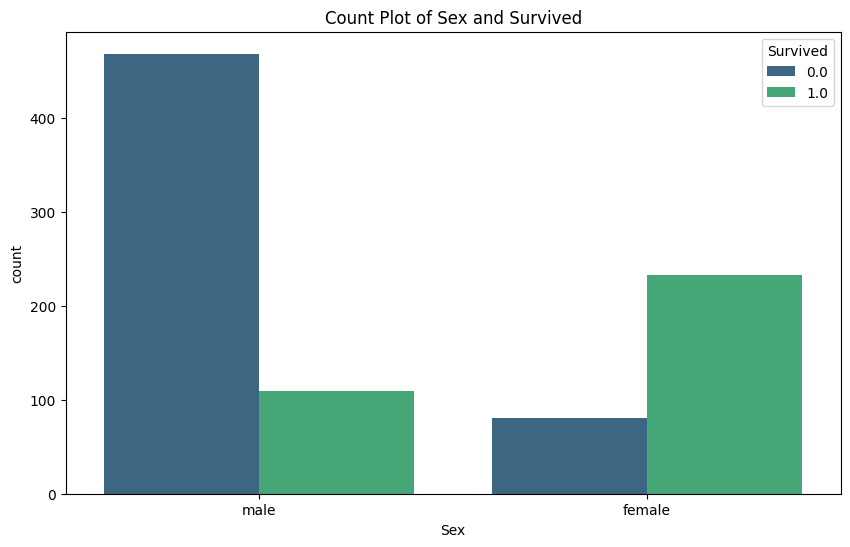

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = cleaned_train_df.select_dtypes(include=['object', 'category']).columns

# Converting 'Survived' to a categorical variable
cleaned_train_df['Survived'] = cleaned_train_df['Survived'].astype('category')

# Count plot for Sex and Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=cleaned_train_df, palette='viridis')
plt.title('Count Plot of Sex and Survived')
plt.show()

## Bar plot for survival rate by Sex


Survival Rate by Sex:
Survived        0.0        1.0
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815



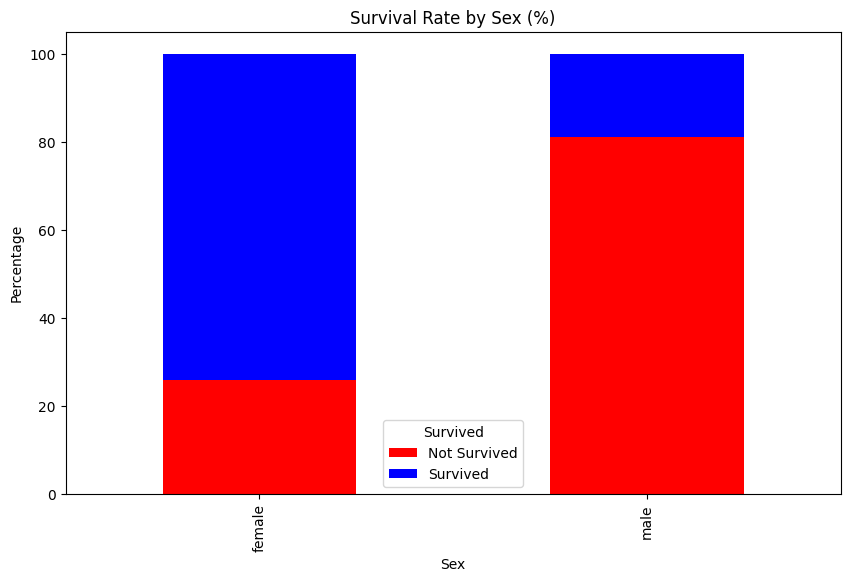

In [62]:
# Survival rate by Sex
survival_counts = cleaned_train_df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
print(f"Survival Rate by Sex:\n{survival_counts}\n")

survival_counts.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(10, 6))
plt.title('Survival Rate by Sex (%)')
plt.ylabel('Percentage')
plt.xlabel('Sex')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

## Groupby and aggregate


In [63]:
grouped_by_sex = cleaned_train_df.groupby('Sex')['Survived'].value_counts().unstack()
grouped_by_sex['total'] = grouped_by_sex.sum(axis=1)
grouped_by_sex['survival_rate'] = grouped_by_sex[1] / grouped_by_sex['total'] * 100
print(f"Grouped Statistics by Sex:\n{grouped_by_sex}\n")

Grouped Statistics by Sex:
Survived  0.0  1.0  total  survival_rate
Sex                                     
female     81  233    314      74.203822
male      468  109    577      18.890815



## Heatmap for cross-tabulation


Cross Tabulation of Sex and Survived:
Survived  0.0  1.0
Sex               
female     81  233
male      468  109



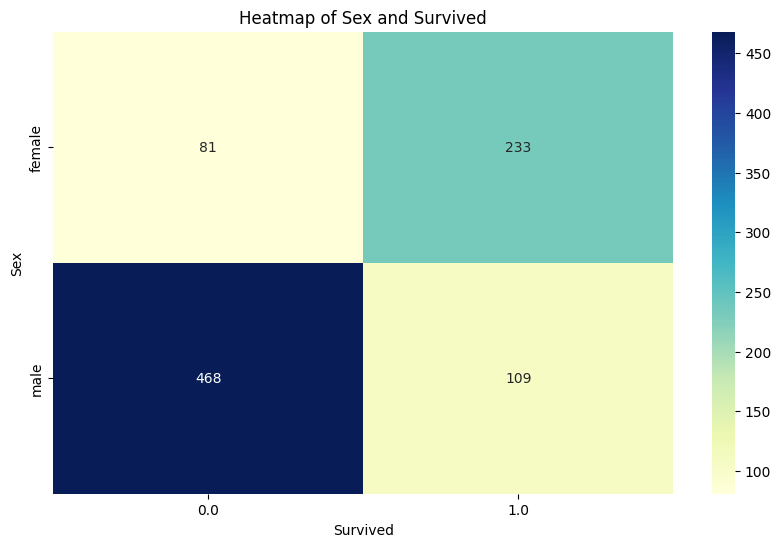

In [64]:
# Cross-tabulation of Sex and Survived
cross_tab = pd.crosstab(cleaned_train_df['Sex'], cleaned_train_df['Survived'])
print(f"Cross Tabulation of Sex and Survived:\n{cross_tab}\n")

# Heatmap for cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Sex and Survived')
plt.show()